<center>
<h2> SWNTIMENT ANALYSIS </h2>
</center>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
nltk.download("stopwords")
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
generic_tweets = pd.read_csv('Sentiment.csv')
print(generic_tweets.shape)
generic_tweets.head()

(133811, 2)


sentiment                                               text
0  Positive  RT @Diplomtc_Immnty: @realDonaldTrump They tri...
1  Negative  @chiefy74 Damn i'm jealous, i wanna watch the ...
2  Positive      I'm listening The Beatles now. They're great 
3  Positive  @ddlovato could i please get a shout out or an...
4  Positive  @salspizza just spotted ur message there Tony ...

In [ ]:
df_test = pd.read_csv('Canadian_elections_2019.csv')
print(df_test.shape)
df_test.head()

(2133, 3)


sentiment  ...                                               text
0  Negative  ...  b"@RosieBarton So instead of your suggestion, ...
1  Positive  ...  b"#AllWomanSpacewalk it's real!\n@Space_Statio...
2  Negative  ...  b"#Brantford It's going to cost YOU $94 BILLIO...
3  Positive  ...  b"#Canada #CanadaElection2019 #CanadaVotes \n#...
4  Negative  ...  b"#Canada #taxpayers are sick &amp; tired of h...

[5 rows x 3 columns]

In [ ]:
# Loading provided stop_words.txt file
stop = pd.read_table("stop_words.txt", names = ['stopwords'])
stop.head()
print(stop.shape)

(665, 1)


In [ ]:
# Loading stopwords(English) from NLTK package
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

stop_nltk = stopwords.words('english')
print(len(stop_nltk))
# Both given list of given stopwords and the list from stoprwords in NLTK package will be used.

179


In [ ]:
#Combining the list of stop words
stop_words = stop.values.tolist()
for word in stop_nltk:
  if word not in stop_words:
    stop_words.append(word)

print('Total number of stop words is {}.'.format(len(stop_words)))

Total number of stop words is 844.


<h2>Data Cleaning</h2>

First the bianary string 'text' will be converted into to string datatype and then the following would be implemented one by one: 

- Encode non ASCII characters to ASCII.
- Remove html tags and keywords.
- Remove URLs.
- Change to lower cases.
- Collect @tag message for test set to detect party.
- Tokenize word stream.
- Remove stop words.
- Remove all non-alphanumerical characters.
- Not removing the rows with empty clean tweets since the assignments explicitly asks to preserve empty cleaned tweets as such.

In [ ]:
# Removing emojies
def remove_emoji(tweet):
  # As emojis are in ASCII character list
  try:
    return tweet.encode('ascii', 'ignore').decode('ascii')
  except:
    return tweet

#Removing the html tags
generic_tweets['cln_tweets'] = generic_tweets['text'].apply(remove_emoji)
df_test['cln_tweets'] = df_test['text'].apply(remove_emoji)

In [ ]:
#Creating new columns to store clean tweets
#Converting all the text enteries into string type
generic_tweets['cln_tweets'] = generic_tweets['cln_tweets'].astype(str)

#Converting all the text enteries into string type
df_test['cln_tweets'] = df_test['cln_tweets'].astype(str)

In [ ]:
# Replace html character codes with ASCII equivalent
import html
def html_ascii(tweet):
  return html.unescape(tweet)

generic_tweets['cln_tweets'] = generic_tweets['cln_tweets'].apply(html_ascii)
df_test['cln_tweets'] = df_test['cln_tweets'].apply(html_ascii)

In [ ]:
# Remove all html tags and attributes 
pattern = re.compile(r'\s*<.*?>')
def clean_html_tag(tweet):
  tweet = re.sub(pattern, '' , tweet)
  return tweet

#Removing the html tags
generic_tweets['cln_tweets'] = generic_tweets['cln_tweets'].apply(clean_html_tag)
df_test['cln_tweets'] = df_test['cln_tweets'].apply(clean_html_tag)

In [ ]:
# Removing different versions of URLs
def cleanurl(tweet):
  ver_1 = '\w+\.\S+'
  tweet = re.sub(ver_1, '', tweet)

  ver_2 = 'https?'
  tweet = re.sub(ver_2, '', tweet)
  
  ver_3 = 'https?:\/\/'
  tweet = re.sub(ver_3, '', tweet)
  
  ver_4 = 'https?:\/\/\w+\S+' 
  tweet = re.sub(ver_4, '', tweet)
  
  ver_5 = 'www\.\w+\S+'
  tweet = re.sub(ver_5, '', tweet)
  return tweet

generic_tweets['cln_tweets'] = generic_tweets['cln_tweets'].apply(cleanurl)
df_test['cln_tweets'] = df_test['cln_tweets'].apply(cleanurl)

In [ ]:
#Make all character lower case
def lowercase(tweet):
  tweet = tweet.lower()
  return tweet

#Converting all the tweets into lowecase strings
generic_tweets['cln_tweets'] = generic_tweets['cln_tweets'].apply(lowercase)
#Converting all the tweets into lowecase strings
df_test['cln_tweets'] = df_test['cln_tweets'].apply(lowercase)

In [ ]:
#Collecting address and hash tags and saving the text
def hashtag_collection(tweet):
  hashtags = ()
  hashtags = ' '.join(re.findall(r'(?<=#)[\w]+\w?', tweet))
  hashtags = ' '.join(re.findall(r'(?<=@)[\w]+\w?', tweet))
  return hashtags

#Removing address tags and keeping hahtag as text
def hashtag_remove(tweet):
  tweet = ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])', ' ', tweet).split())
  return tweet
  

#Removing address tag from the generic data and saving address and hastags
generic_tweets['@ and # tags'] = generic_tweets['cln_tweets'].apply(hashtag_collection)
generic_tweets['cln_tweets'] = generic_tweets['cln_tweets'].apply(hashtag_remove)

#Removing address tag from the generic data and saving address and hastags
df_test['@ and # tags'] = df_test['cln_tweets'].apply(hashtag_collection)
df_test['cln_tweets'] = df_test['cln_tweets'].apply(hashtag_remove)

In [ ]:
df_test.head()

sentiment  ...             @ and # tags
0  Negative  ...              rosiebarton
1  Positive  ...            space_station
2  Negative  ...                         
3  Positive  ...                         
4  Negative  ...  snclavalin sheila_copps

[5 rows x 5 columns]

In [ ]:
generic_tweets.head()

sentiment  ...                             @ and # tags
0  Positive  ...  diplomtc_immnty realdonaldtrump foxnews
1  Negative  ...                                 chiefy74
2  Positive  ...                                         
3  Positive  ...                                 ddlovato
4  Positive  ...                                salspizza

[5 rows x 4 columns]

<b>Tokenizing</b> tweets, removing stop words and non alphabetic caharacter word and changing to words to root form.

In [ ]:
nltk.download('wordnet')
def tok_rm_stop_root(tweet, stop_words):
  tokenizer = RegexpTokenizer(r'\w+')
  sp = ' '
  tok_tweet = tokenizer.tokenize(tweet)
  # removing stop words
  words_rmStop = [word for word in tok_tweet if word not in stop_words]
  # removing non-alphabetic characters
  word_tokens = [word for word in words_rmStop if word.isalpha()]
  ps = PorterStemmer()
  # stemming to reduce inflection in words
  words_stem = [ps.stem(word) for word in word_tokens]
  lemmatizer = nltk.WordNetLemmatizer()
  words = [lemmatizer.lemmatize(word) for word in words_stem]
  return(sp.join(words))

#Adding 'b' to the stop words because it appearing frequently and has no information
stop_words.append('b')

#Tokenizing removing stop words, non-alphabetic characters, and changing to root
tweets_list = []
for tweet in generic_tweets['cln_tweets']:
  tweets_list.append(tok_rm_stop_root(tweet, stop_words))
generic_tweets['cln_tweets'] = tweets_list

#Tokenizing removing stop words, non-alphabetic characters, and changing to root
tweets_list = []
for tweet in df_test['cln_tweets']:
  tweets_list.append(tok_rm_stop_root(tweet, stop_words))
df_test['cln_tweets'] = tweets_list

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<h2>Exploratory Data Analysis</h2>

- Identifying commonly used words in generic tweets.
- Identifying commonly used words in poitive and negative generic tweets to see if there is a common difference.
- Identifying the party of the unclassified tweet using key words and tags.
- Plotting the distribution for number of examples.
- Identifying common words in each set of unclassified tweets. 


In [ ]:
#Importing essential libraries
from collections import Counter
from functools import reduce
import matplotlib.pyplot as plt
try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  from wordcloud import WordCloud
import seaborn as sns

In [ ]:
#Checking if the dataset is balanced
sentiments = generic_tweets['sentiment'].values.tolist()
pos_sentiment = []
neg_sentiment = []
neu_sentiment = []

for i in range(len(generic_tweets)):
    if sentiments[i] == 'Positive':
      pos_sentiment.append(generic_tweets['cln_tweets'][i])
    elif sentiments[i] == 'Negative':
      neg_sentiment.append(generic_tweets['cln_tweets'][i])
    else:
      neu_sentiment.append(generic_tweets['cln_tweets'][i])

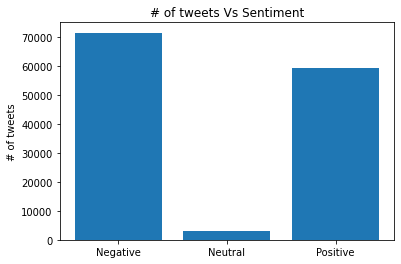

In [ ]:
# plot a histogram for the split
labels, counts = np.unique(sentiments,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, labels)
plt.ylabel('# of tweets')
plt.title('# of tweets Vs Sentiment')
plt.show()

The dataset has almost a balanced split between Negative and Positive sentiment tweets and the dataset also has some neutral sentiment statement.

In [ ]:
#Extracting words in a list of tweets
def words_in_tweets(tweets):
    word_list = []
    templist = []
    for i in range(len(tweets)):
        templist = tweets[i].split(' ')
        for word in templist:
            word_list.append(word)
    return word_list

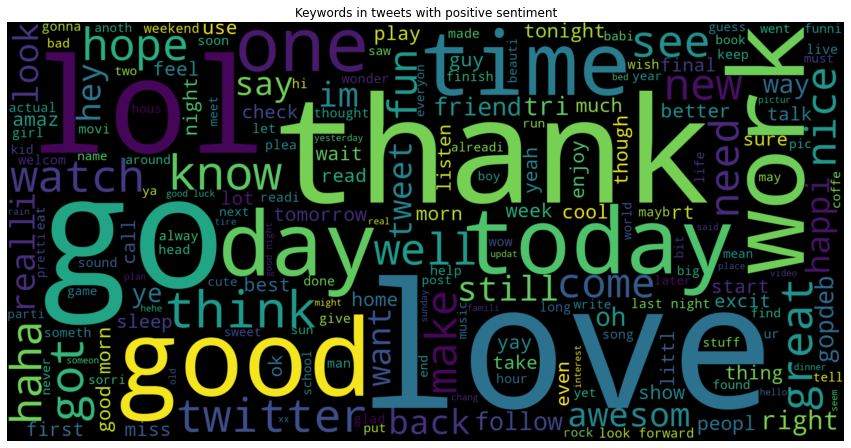

In [ ]:
#Checking highly occuring words in each type of sentiment 
pos_wordlist = words_in_tweets(pos_sentiment)
#Joining the list
pos_words = ' '.join(pos_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(pos_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in tweets with positive sentiment')
plt.axis("off")
plt.show()

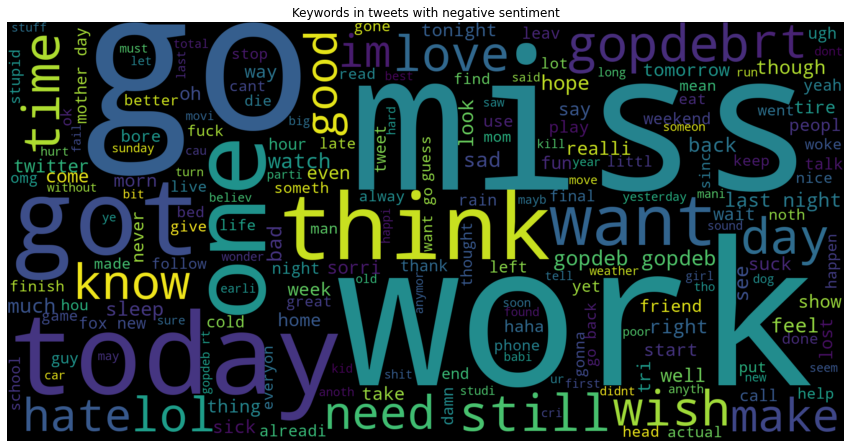

In [ ]:
neg_wordlist = words_in_tweets(neg_sentiment)
#Joining the list
neg_words = ' '.join(neg_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(neg_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in tweets with negative sentiment')
plt.axis("off")
plt.show()

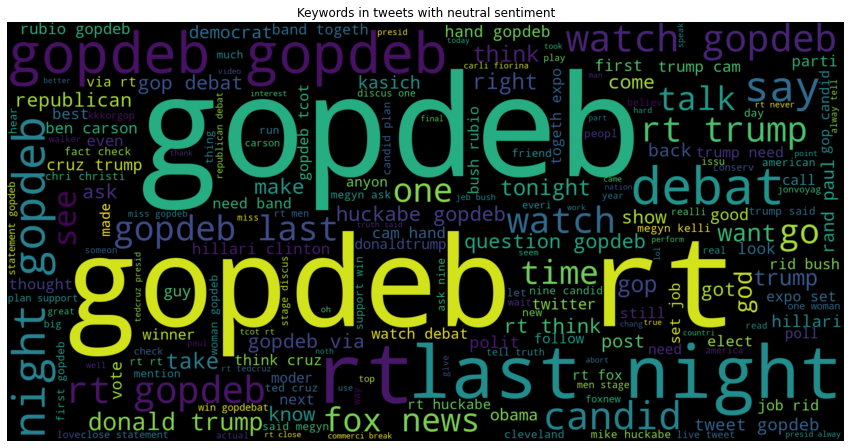

In [ ]:
neu_wordlist = words_in_tweets(neu_sentiment)
#Joining the list
neu_words = ' '.join(neu_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(neu_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in tweets with neutral sentiment')
plt.axis("off")
plt.show()

<b>Tweet</b> party recognition.

In [ ]:
def party_name(tweet, tags):
  '''
  The function take takes a single tweet as imput and analyze the keyword in it. 
  It compares the word frequency of each tweet in the key word list for each party.
  The output is a politican party name of the single twitter. 
  If a tweet is identified as more than one party attribute, it choose the most common party names.
  If no keyword is found it sets the tweet to be other party tweet.
  '''
  tw = tweet.split(' ')
  tags = tags.split(' ')
  tw_n_tags = tw + tags
  # keywords of each party
  liberal =['trudeau', "justin", "justintrudeau", "liberal", "liberals", "realchange",
            "red", "teamtrudeau", "lpc", "real change", "liberal_party"]
  conservative=["andrewscheer", "andrew", "scheer", "conservative", "conservatives", "blue","cpc"]
  NDP=["uprisingh", "ndp", "orange", "quebec", "tommulcair", "mulcair", "ptndp", "ready4change", "thejasmeetsingh"]
  other = ["green", "freedom"]
  # we only defined words in lowercase format, since all words in tweet line are converted to lowercase
  party = []

  for word in liberal:   
    if word in tw_n_tags:
      party.append('Liberal')
      
  for word in conservative:
    if word in tw_n_tags:
      party.append('Conservative')
        
  for word in NDP:
    if word in tw_n_tags:
      party.append('NDP')
        
  for word in other:
    if word in tw_n_tags:
      party.append('Other')
  # choose the most common party name for this tweet
  if len(party) > 1:
      most_common = max(set(party), key=party.count)
      party = []
      party.append(most_common)
  elif len(party) == 0:
      party.append('Other')
      
  return party[0]

#Grouping tweets based on party
party_list = []
tweets_no_party_list = []
no_party_tags = []
liberal_tweets = []
liberal_tags = []
conservative_tweets = []
conservative_tags = []
ndp_tweets = []
ndp_tags = []

for i in range(len(df_test)):   
  party_determinant = party_name(df_test['cln_tweets'][i], df_test['@ and # tags'][i])
  party_list.append(party_determinant)
  if party_determinant == 'Liberal':
    liberal_tweets.append(df_test['cln_tweets'][i])
    liberal_tags.append(df_test['@ and # tags'][i])
  elif party_determinant == 'Conservative':
    conservative_tweets.append(df_test['cln_tweets'][i])
    conservative_tags.append(df_test['@ and # tags'][i])
  elif party_determinant == 'NDP':
    ndp_tweets.append(df_test['cln_tweets'][i])
    ndp_tags.append(df_test['@ and # tags'][i])
  elif party_determinant == 'Other':
    tweets_no_party_list.append(df_test['cln_tweets'][i])
    no_party_tags.append(df_test['@ and # tags'][i])

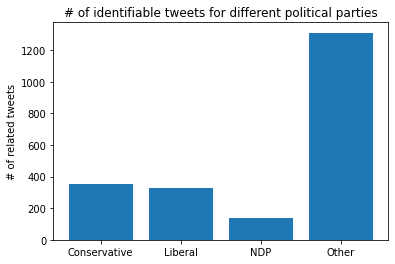

In [ ]:
# plot a histogram for the distribution
labels, counts = np.unique(party_list,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks, counts, align='center')
plt.xticks(ticks, labels)
plt.ylabel('# of related tweets')
plt.title('# of identifiable tweets for different political parties')
plt.show()

Liberal and Conservative parties has more tweets compare to NDP. 

<b>Bonus section</b> for exploratory analysis.

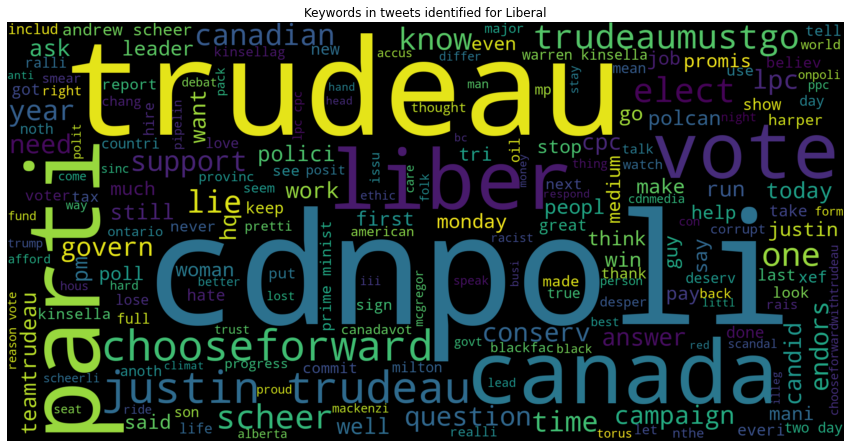

In [ ]:
liberal_wordlist = words_in_tweets(liberal_tweets)
#Joining the list
liberal_words = ' '.join(liberal_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(liberal_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in tweets identified for Liberal')
plt.axis("off")
plt.show()

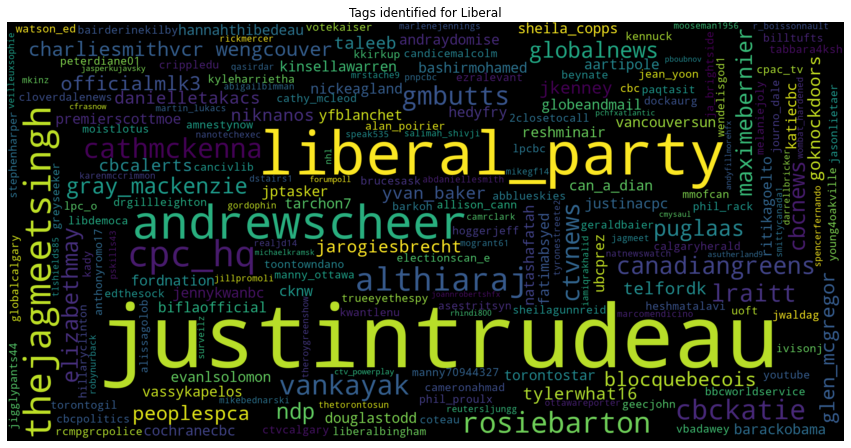

In [ ]:
#Common hastags and address tags for liberal party tweets
liberal_taglist = words_in_tweets(liberal_tags)
#Joining the list
liberal_tag = ' '.join(liberal_taglist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(liberal_tag)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tags identified for Liberal')
plt.axis("off")
plt.show()

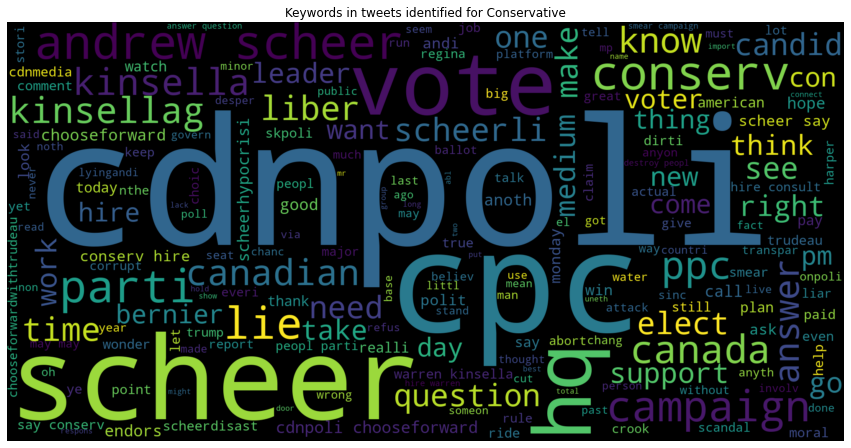

In [ ]:
conservative_wordlist = words_in_tweets(conservative_tweets)
#Joining the list
conservative_words = ' '.join(conservative_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(conservative_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in tweets identified for Conservative')
plt.axis("off")
plt.show()

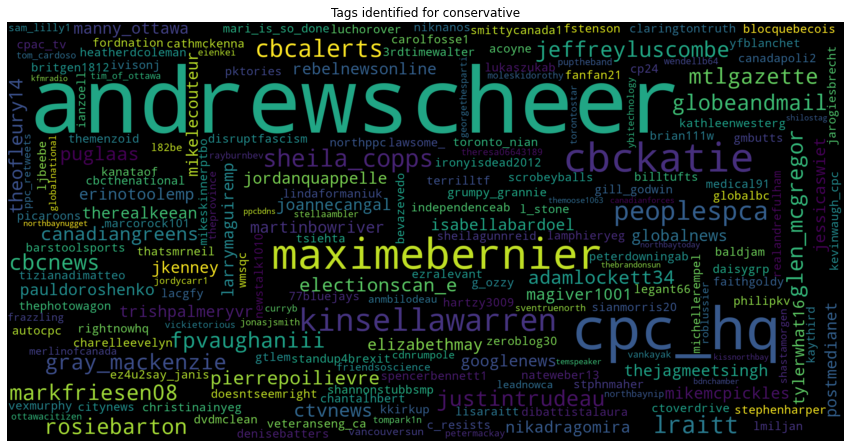

In [ ]:
#Common hastags and address tags for conservative party tweets
conservative_taglist = words_in_tweets(conservative_tags)
#Joining the list
conservative_tag = ' '.join(conservative_taglist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(conservative_tag)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tags identified for conservative')
plt.axis("off")
plt.show()

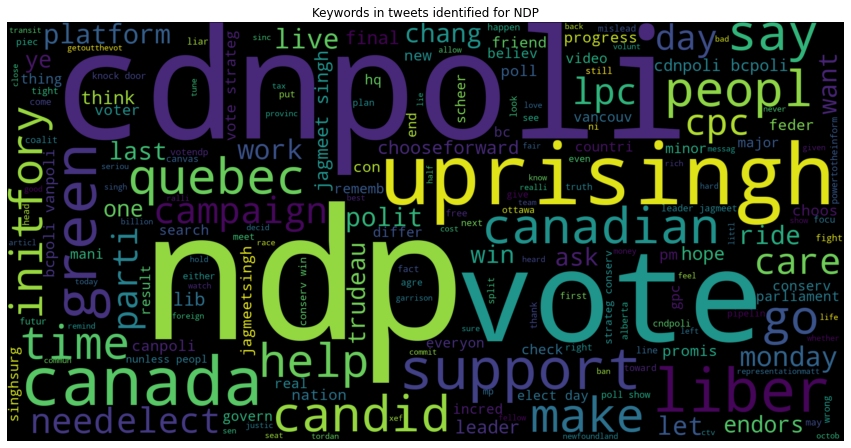

In [ ]:
ndp_wordlist = words_in_tweets(ndp_tweets)
#Joining the list
ndp_words = ' '.join(ndp_wordlist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(ndp_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keywords in tweets identified for NDP')
plt.axis("off")
plt.show()

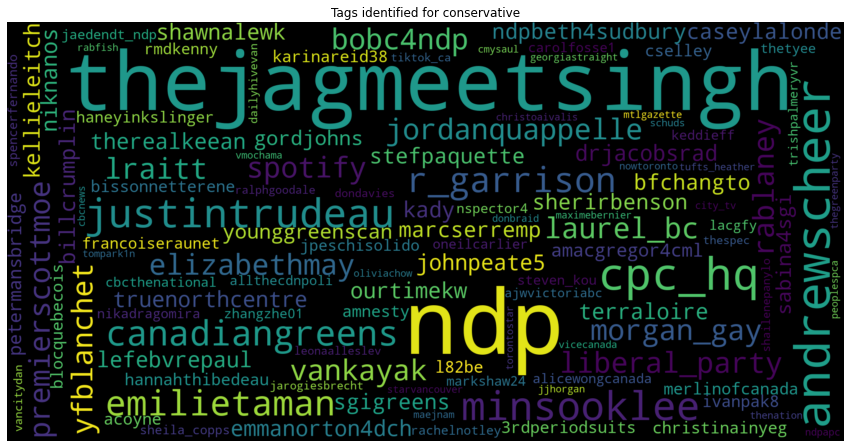

In [ ]:
#Common hastags and address tags for NDP party tweets
ndp_taglist = words_in_tweets(ndp_tags)
#Joining the list
ndp_tag = ' '.join(ndp_taglist)
wordcloud = WordCloud(width = 2000, height = 1000).generate(ndp_tag)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tags identified for conservative')
plt.axis("off")
plt.show()

<h3> Model Prepration </h3>

- (i) Word Frequency
- (ii) tf-idf (Term Frequency Inverse Document Frequency)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, learning_curve
#Splitting the data
X = generic_tweets['cln_tweets'].values.tolist()
y = generic_tweets['sentiment'].values.tolist()

#Since we are asked to perform binary classification of sentiments I would consider neutral sentiment to be negative
for i in range(len(y)):
  if y[i] == 'Neutral':
    y[i] = 'Negative'

y = np.asarray(y)
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)
# creating a validation set to select the best model
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


Neutral statements in the dataset are changed to negative because Negative has maximum number of count in the dataset.

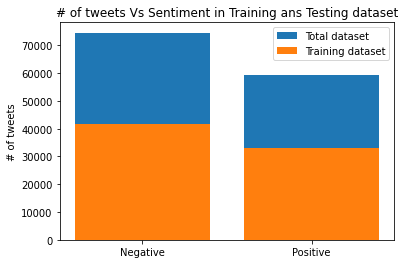

In [ ]:
#Ensuring that the dataset is more or less balanced in the data-set.
#plot a histogram for the split
labels, counts = np.unique(y, return_counts=True)
ticks = range(len(counts))

labels, counts_train = np.unique(y_train, return_counts=True)

plt.bar(ticks, counts, align='center', label = 'Total dataset')
plt.bar(ticks, counts_train, align='center', label = 'Training dataset')
plt.xticks(ticks, labels)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs Sentiment in Training ans Testing dataset')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

(a) <b>Word Frequency</b>

In [ ]:
vectorizer = CountVectorizer(min_df=0.002) #Considering a words having density >0.002 times to restrict the vocabulary
X_train_WF = vectorizer.fit_transform(X_train).toarray()

In [ ]:
print('The number of words in the ditionary is {}'.format(len(vectorizer.get_feature_names())))
print('Shape of training set with word frequency is {}'.format(X_train_WF.shape))

The number of words in the ditionary is 549
Shape of training set with word frequency is (74933, 549)


In [ ]:
#Fitting this word frequency transformation to training and validation set.
X_val_WF = vectorizer.transform(X_val).toarray()
X_test_WF = vectorizer.transform(X_test).toarray()

(b) <b>tf-idf</b>

In [ ]:
vectorizer_ = TfidfVectorizer(min_df = 0.002, use_idf=True, smooth_idf=True, norm=None)
X_train_tfidf = vectorizer_.fit_transform(X_train).toarray()

In [ ]:
print('The number of words in the ditionary is {}'.format(len(vectorizer_.get_feature_names())))
print('Shape of training set with tfidf is {}'.format(X_train_tfidf.shape))

The number of words in the ditionary is 549
Shape of training set with tfidf is (74933, 549)


In [ ]:
#Fitting this tfidf transformation to training and validation set.
X_val_tfidf = vectorizer_.transform(X_val).toarray()
X_test_tfidf = vectorizer_.transform(X_test).toarray()

<h4> Model Implementation<h4>

- (i) Logistic regression
- (ii) k-NN
- (iii) Naive Bayes
- (iv) SVM
- (v) Decision Tree
-(vi) Random Forest


<h3>A. Using Word Frequency</h3>

(i) <b>Logistic Regression</b>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, plot_roc_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#fitting a model
model = LogisticRegression(penalty = 'l2', C = 0.5, solver = 'newton-cg', max_iter = 100, verbose = 0)
model.fit(X_train_WF, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Checking Performance of the model on trainig set
predictions = model.predict(X_train_WF)
pred_proba = model.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 73.67781885150735%.


<b>Hyperparameter tuning</b>: Using grid search hyperparameter tuning to find the optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for Logistic Regression
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_WF)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for solver in ['newton-cg','liblinear','sag']:
    for c in [0.01, 0.1, 0.5, 1]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'pen' : 'l2', 'sol': solver, 'c': c, 'max_iter': 100}
      print('\n c = {}, solver = {}\n'.format(hps['c'], hps['sol']))
      for train_idx, test_idx in kfolds.split(X_train_WF):
        x_t, x_te = X_train_WF[train_idx], X_train_WF[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        model = LogisticRegression(penalty = 'l2', C = c, solver = solver, max_iter = 100, verbose = 0)
        model = model.fit(x_t, y_t)
        
        predictions = model.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for {} solver, {} penalty with C = {} : {}%({}%)".format(solver, 'L2', c, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'sol': solver, 'C': c}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(solver == 'newton-cg'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 c = 0.01, solver = newton-cg

Fold: 1, Accuracy: 72.36271435243879%
Fold: 2, Accuracy: 72.10916127310337%
Fold: 3, Accuracy: 71.98238473343565%
Fold: 4, Accuracy: 72.20072067262778%
Fold: 5, Accuracy: 71.80034699052449%
Average Accuracy for newton-cg solver, L2 penalty with C = 0.01 : 72.091%(0.191%)

 c = 0.1, solver = newton-cg

Fold: 1, Accuracy: 73.28351237739375%
Fold: 2, Accuracy: 72.97657970240876%
Fold: 3, Accuracy: 72.84313071328484%
Fold: 4, Accuracy: 73.17496329907914%
Fold: 5, Accuracy: 72.74789803816896%
Average Accuracy for newton-cg solver, L2 penalty with C = 0.1 : 73.005%(0.2%)

 c = 0.5, solver = newton-cg

Fold: 1, Accuracy: 73.2167878828318%
Fold: 2, Accuracy: 73.21011543337559%
Fold: 3, Accuracy: 72.78975111763528%
Fold: 4, Accuracy: 73.27505671960498%
Fold: 5, Accuracy: 72.8546643533965%
Average Accuracy for newton-cg solver, L2 penalty with C = 0.5 : 73.069%(0.204%)

 c = 1, solver = newton-cg

Fold: 1, Accuracy: 73.31687462467472%
Fold: 2, Accuracy: 73.2434776

Best hyerparameters from this grid-search turn out to be: 
 Solver: liblinear       with L2 regularization and C = 1 
 5-folds cross-validation score for this       model is: 73.08261991123211(0.2490461772181856)


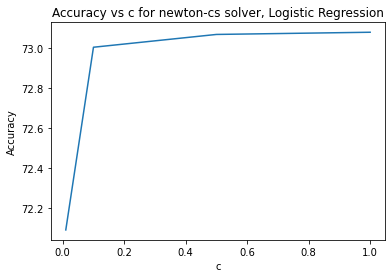

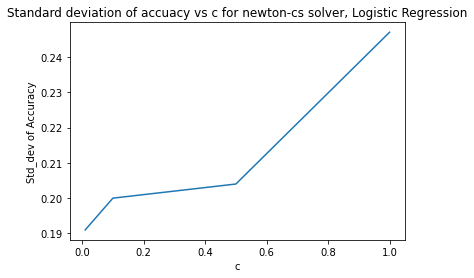

In [ ]:
print('Best hyerparameters from this grid-search turn out to be: \n Solver: {}\
       with L2 regularization and C = {} \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['sol'], best_params['C'], best_accuracy, best_std))

#bias-variance tradeoff 
x = [0.01, 0.1, 0.5, 1]
plt.plot(x, ACC)
plt.title('Accuracy vs c for newton-cs solver, Logistic Regression')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for newton-cs solver, Logistic Regression')
plt.xlabel('c')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#Best Logistic Regression model
model = LogisticRegression(penalty = 'l2', C = best_params['C'], solver = best_params['sol'], max_iter = 100, verbose = 0)
model.fit(X_train_WF, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Performance of best model on training set
predictions = model.predict(X_train_WF)
pred_proba = model.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of best logistic regression model is {}%.'.format(train_acc*100))

Training Accuracy of best logistic regression model is 73.84997264222706%.


Validation Accuracy of best logistic regression model is 72.6753496316857%.


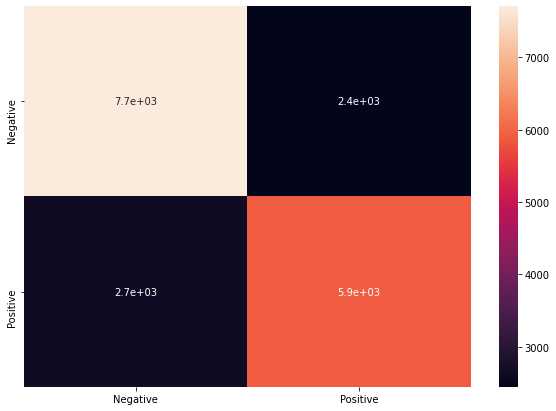

In [ ]:
#Performance of best model on validation set
predictions = model.predict(X_val_WF)
pred_proba = model.predict_proba(X_val_WF)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of best logistic regression model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

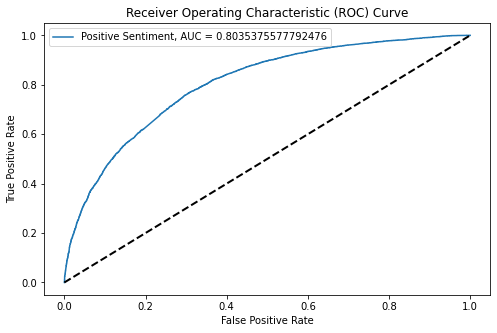

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(ii) <b> kNN Classifier</b>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Fitting a k-NN model
kNN = KNeighborsClassifier(n_neighbors=2)
kNN.fit(X_train_WF, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#Checking the model performance on validation set
#High test time for kNN
predictions = kNN.predict(X_val_WF)
#pred_proba = kNN.predict_proba(X_val_WF)

train_acc = ((predictions == y_val).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 56.99999999999999%.


Test time of kNN is extremly arge because the dataset itself is too large therefore using kNN is not an effective way given algorithms memory requirement and test time.

Not implementing hyperparameter tuning for kNN.

(iii) <b>Naive Bayes</b>

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Fitting the Naive-Bayes model
NB = GaussianNB()
NB.fit(X_train_WF, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Performance of the model on training set
predictions = NB.predict(X_train_WF)
pred_proba = NB.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of Naive Bayes model is {}%.'.format(train_acc*100))

Training Accuracy of Naive Bayes model is 67.08392830928963%.


No hyperparametrs for naive Bayes model, therfore no tuning is required for this model.

In [ ]:
#Performance of the model on validation set
predictions = NB.predict(X_val_WF)
pred_proba = NB.predict_proba(X_val_WF)

train_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of Naive Bayes model is {}%.'.format(train_acc*100))

Validation Accuracy of Naive Bayes model is 66.264545745703%.


(iv) <b>SVM (Support Vector Machine)</b>

[Note: SVM has other techniques like NuSVM and LinearSVM but for assignment I am only implementing standarf SVM which is SVC for classification.

In [ ]:
#Since the dataset is big I will use 
from sklearn.linear_model import SGDClassifier

In [ ]:
#Since SVC requires proper scaling
scalar = StandardScaler()
X_train_WF_scaled = scalar.fit_transform(X_train_WF)
X_val_WF_scaled = scalar.transform(X_val_WF)
X_test_WF_scaled = scalar.transform(X_test_WF)

#fitting a model
svm = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.1, max_iter = 1000)
svm.fit(X_train_WF_scaled, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Checking Performance of the model on trainig set
predictions = svm.predict(X_train_WF)
#No probability prediction for svm.svc

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 57.38326238106042%.


<b>Hyperparameter tuning</b>: Using grid search hyperparameter tuning to find the optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for SVC
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_WF_scaled)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
#for loss in ['hinge', 'log', 'perceptron']:
for pen in ['l2', 'l1', 'elasticnet']:
    for c in [0.01, 0.1, 1]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'l': 'hinge', 'pen': pen, 'c': c, 'max_iter': 1000}
      print('\n pen = {}, {} loss and c = {}\n'.format(hps['pen'], hps['l'], hps['c']))
      for train_idx, test_idx in kfolds.split(X_train_WF_scaled):
        x_t, x_te = X_train_WF_scaled[train_idx], X_train_WF_scaled[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        svc = SGDClassifier(loss = 'hinge', penalty = pen, alpha = c, max_iter = 1000)
        svc = svc.fit(x_t, y_t)
        
        predictions = svc.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for hinge loss with {} penalty, with C = {} : {}%({}%)".format(pen, c, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'pen': pen, 'C': c}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(pen == 'l2'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 pen = l2, hinge loss and c = 0.01

Fold: 1, Accuracy: 72.86314806165343%
Fold: 2, Accuracy: 72.89651030893441%
Fold: 3, Accuracy: 72.68966437579235%
Fold: 4, Accuracy: 73.1349259308688%
Fold: 5, Accuracy: 73.20832777258775%
Average Accuracy for hinge loss with l2 penalty, with C = 0.01 : 72.959%(0.189%)

 pen = l2, hinge loss and c = 0.1

Fold: 1, Accuracy: 72.9232001067592%
Fold: 2, Accuracy: 72.68299192633616%
Fold: 3, Accuracy: 72.64962967905518%
Fold: 4, Accuracy: 72.79460830108101%
Fold: 5, Accuracy: 73.2550380354998%
Average Accuracy for hinge loss with l2 penalty, with C = 0.1 : 72.861%(0.219%)

 pen = l2, hinge loss and c = 1

Fold: 1, Accuracy: 62.82111163007941%
Fold: 2, Accuracy: 69.0264896243411%
Fold: 3, Accuracy: 69.1666110629212%
Fold: 4, Accuracy: 69.35806752969438%
Fold: 5, Accuracy: 63.49926598158281%
Average Accuracy for hinge loss with l2 penalty, with C = 1 : 66.774%(2.961%)

 pen = l1, hinge loss and c = 0.01

Fold: 1, Accuracy: 70.52111830252886%
Fold: 2, Accur

Best hyerparameters from this grid-search turn out to be: 
        with l2 regularization with C = 0.01 for hinge loss 
 5-folds cross-validation score for this       model is: 72.95851528996734(0.1890752922293859)


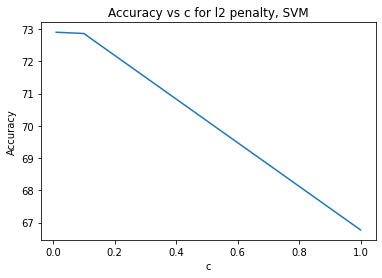

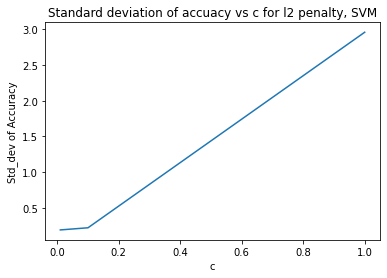

In [ ]:
print('Best hyerparameters from this grid-search turn out to be: \n \
       with {} regularization with C = {} for hinge loss \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['pen'], best_params['C'], best_accuracy, best_std))


#bias-variance tradeoff 
x = [0.01, 0.1, 1]
plt.plot(x, ACC)
plt.title('Accuracy vs c for l2 penalty, SVM')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for l2 penalty, SVM')
plt.xlabel('c')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#Best SVC model
svc = SGDClassifier(loss = 'hinge', penalty = best_params['pen'], alpha = best_params['C'], max_iter = 1000)
svc.fit(X_train_WF, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Performance of best model on training set
predictions = svc.predict(X_train_WF_scaled)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of best SVC model is {}%.'.format(train_acc*100))

Training Accuracy of best SVC model is 72.30993020431585%.


Validation Accuracy of best logistic regression model is 71.37824276716131%.


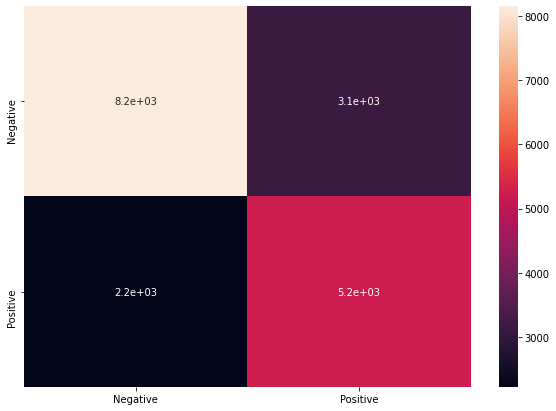

In [ ]:
#Performance of best model on validation set
predictions = svc.predict(X_val_WF_scaled)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of best logistic regression model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

SVC is giving 71% accuracy for validation set using word frequency as features.

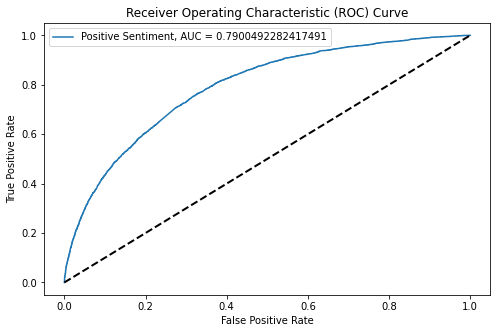

In [ ]:
score_roc = svc.decision_function(X_val_WF_scaled)
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  score_roc)
auc = roc_auc_score(b_y_val, score_roc)
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(v) <b>Decision Tree</b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting a model
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
dt.fit(X_train_WF, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Checking Performance of the model on trainig set
predictions = dt.predict(X_train_WF)
pred_proba = dt.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 61.679099995996424%.


<b>Hyperparameter tuning</b>: Using grid search hyperparameter tuning to find the optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for Decision Tree
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_WF)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for criterion in ['gini', 'entropy']:
    for depth in [5, 10, 20, 50, 100, 200, 500]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'max_depth': depth, 'c': criterion}
      print('\n criterion = {}, max depth = {}\n'.format(hps['c'], hps['max_depth']))
      for train_idx, test_idx in kfolds.split(X_train_WF):
        x_t, x_te = X_train_WF[train_idx], X_train_WF[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        dt = DecisionTreeClassifier(criterion = criterion, max_depth = depth)
        dt = dt.fit(x_t, y_t)
        
        predictions = dt.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for {} selection criterion, with max depth = {} : {}%({}%)".format(criterion, depth, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'c': criterion, 'max_depth': depth}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(criterion == 'gini'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 criterion = gini, max depth = 5

Fold: 1, Accuracy: 59.81850937479148%
Fold: 2, Accuracy: 58.810969506905984%
Fold: 3, Accuracy: 60.19216654433842%
Fold: 4, Accuracy: 59.428800213532625%
Fold: 5, Accuracy: 59.68237021219805%
Average Accuracy for gini selection criterion, with max depth = 5 : 59.587%(0.46%)

 criterion = gini, max depth = 10

Fold: 1, Accuracy: 61.30646560352305%
Fold: 2, Accuracy: 60.71929005137786%
Fold: 3, Accuracy: 62.000400346967375%
Fold: 4, Accuracy: 61.1504070465768%
Fold: 5, Accuracy: 61.350593887628456%
Average Accuracy for gini selection criterion, with max depth = 10 : 61.305%(0.413%)

 criterion = gini, max depth = 20

Fold: 1, Accuracy: 63.18809635017014%
Fold: 2, Accuracy: 62.8277840795356%
Fold: 3, Accuracy: 63.22145859745112%
Fold: 4, Accuracy: 63.38582677165354%
Fold: 5, Accuracy: 62.43160282930735%
Average Accuracy for gini selection criterion, with max depth = 20 : 63.011%(0.342%)

 criterion = gini, max depth = 50

Fold: 1, Accuracy: 65.9438179755

Best hyerparameters from this grid-search turns out to be 
  gini selection criterion        with max depth = 200 
 5-folds cross-validation score for this       model is: 66.917(0.199)


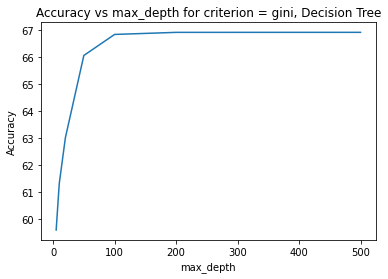

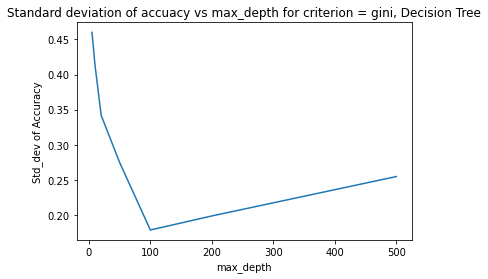

In [ ]:
print('Best hyerparameters from this grid-search turns out to be \n  {} selection criterion \
       with max depth = {} \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['c'], best_params['max_depth'], best_accuracy, best_std))

#bias-variance tradeoff 
x = [5, 10, 20, 50, 100, 200, 500]
plt.plot(x, ACC)
plt.title('Accuracy vs max_depth for criterion = gini, Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs max_depth for criterion = gini, Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#fitting the selected model
dt = DecisionTreeClassifier(criterion = best_params['c'], max_depth = best_params['max_depth'])
dt = dt.fit(X_train_WF, y_train)

In [ ]:
#Performance of best model on training set
predictions = dt.predict(X_train_WF)
pred_proba = dt.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of best SVC model is {}%.'.format(train_acc*100))

Training Accuracy of best SVC model is 90.08847904127687%.


Validation Accuracy of best Decision Tree model is 67.51361161524501%.


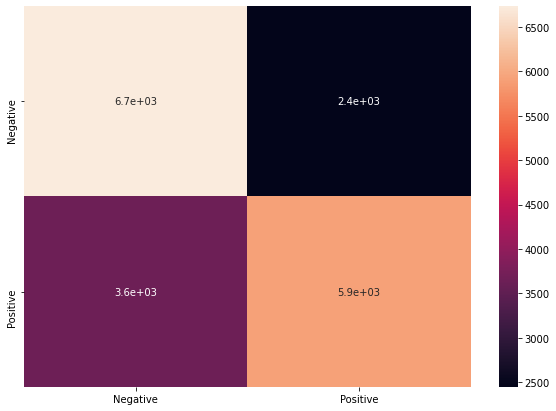

In [ ]:
#Performance of this model on the validation set
predictions = dt.predict(X_val_WF)
pred_proba = dt.predict_proba(X_val_WF)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of best Decision Tree model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

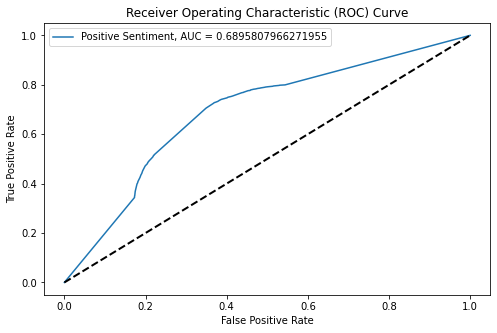

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(vi) <b>Random Forest Classifier</b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='gini')
rf.fit(X_train_WF, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Checking Performance of the model on trainig set
predictions = rf.predict(X_train_WF)
pred_proba = rf.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 94.12274965635969%.


<b>Hyperparameter tuning</b>: Using oobscore find the optimal set of hyperparameters.

In [ ]:
ACC_score_gini = []
ACC_score_entropy = []

for criterion in ['gini', 'entropy']:
    for n in [10, 20, 50, 100]:
      rf = RandomForestClassifier(n_estimators = n, criterion=criterion, bootstrap=True, oob_score =True)
      rf = rf.fit(X_train_WF, y_train)
      if criterion == 'gini':
        ACC_score_gini.append(rf.oob_score_)
      elif criterion == 'entropy':
        ACC_score_entropy.append(rf.oob_score_)
      print('For selection criterion {} and number of estimators {} the OOB error is {}'.format(criterion, n, rf.oob_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 10 the OOB error is 0.6910306540509522


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 20 the OOB error is 0.7030814194013318
For selection criterion gini and number of estimators 50 the OOB error is 0.7100743330708766
For selection criterion gini and number of estimators 100 the OOB error is 0.7132238132731907


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 10 the OOB error is 0.6919915124177599


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 20 the OOB error is 0.7042291113394632
For selection criterion entropy and number of estimators 50 the OOB error is 0.7133572658241363
For selection criterion entropy and number of estimators 100 the OOB error is 0.7174142233728797


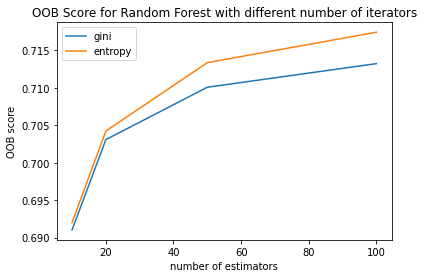

In [ ]:
#plotting the oob scores
x = [10, 20, 50, 100]
plt.plot(x, ACC_score_gini, label = 'gini')
plt.plot(x, ACC_score_entropy, label = 'entropy')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

In [ ]:
#Choosing the best and easy to fit model
n = 100
c = 'gini'
rf = RandomForestClassifier(n_estimators = n, criterion=criterion)
rf = rf.fit(X_train_WF, y_train)

#Checking the models performance on the training set
predictions = rf.predict(X_train_WF)
#pred_proba = rf.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 94.12675323288805%.


Training Accuracy of the model is 71.56506885875947%.


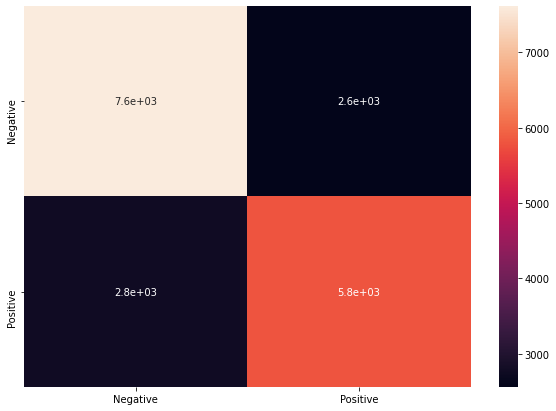

In [ ]:
#Checking the models performance on the validation set set
predictions = rf.predict(X_val_WF)
pred_proba = rf.predict_proba(X_val_WF)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

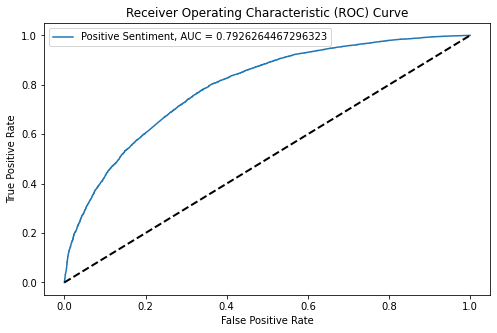

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

<h3>B. Using tf-idf</h3>
(i) <b>Logistic Regression</b>

In [ ]:
#fitting a model
model = LogisticRegression(penalty = 'l2', C = 0.5, solver = 'newton-cg', max_iter = 100, verbose = 0)
model.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Checking Performance of the model on trainig set
predictions = model.predict(X_train_tfidf)
pred_proba = model.predict_proba(X_train_tfidf)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 72.00032028612226%.


<b>Hyperparameter tuning</b>: Using grid search to find optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for Logistic Regression
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_tfidf)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for solver in ['newton-cg','liblinear','sag']:
    for c in [0.01, 0.1, 0.5, 1]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'pen' : 'l2', 'sol': solver, 'c': c, 'max_iter': 100}
      print('\n c = {}, solver = {}\n'.format(hps['c'], hps['sol']))
      for train_idx, test_idx in kfolds.split(X_train_tfidf):
        x_t, x_te = X_train_tfidf[train_idx], X_train_tfidf[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        model = LogisticRegression(penalty = 'l2', C = c, solver = solver, max_iter = 100, verbose = 0)
        model = model.fit(x_t, y_t)
        
        predictions = model.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for {} solver, {} penalty with C = {} : {}%({}%)".format(solver, 'L2', c, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'sol': solver, 'C': c}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(solver == 'newton-cg'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 c = 0.01, solver = newton-cg

Fold: 1, Accuracy: 73.25682257956896%
Fold: 2, Accuracy: 73.17675318609461%
Fold: 3, Accuracy: 72.9098552078468%
Fold: 4, Accuracy: 73.28172961430668%
Fold: 5, Accuracy: 73.51528092886694%
Average Accuracy for newton-cg solver, L2 penalty with C = 0.01 : 73.228%(0.195%)

 c = 0.1, solver = newton-cg

Fold: 1, Accuracy: 73.16340828718224%
Fold: 2, Accuracy: 73.15673583772603%
Fold: 3, Accuracy: 72.87649296056583%
Fold: 4, Accuracy: 73.321766982517%
Fold: 5, Accuracy: 73.58200987588415%
Average Accuracy for newton-cg solver, L2 penalty with C = 0.1 : 73.22%(0.231%)

 c = 0.5, solver = newton-cg

Fold: 1, Accuracy: 73.15006338826984%
Fold: 2, Accuracy: 73.16340828718224%
Fold: 3, Accuracy: 72.84313071328484%
Fold: 4, Accuracy: 73.29507540371013%
Fold: 5, Accuracy: 73.58200987588415%
Average Accuracy for newton-cg solver, L2 penalty with C = 0.5 : 73.207%(0.239%)

 c = 1, solver = newton-cg

Fold: 1, Accuracy: 73.15006338826984%
Fold: 2, Accuracy: 73.1634082

Best hyerparameters from this grid-search turn out to be: 
 Solver: newton-cg       with L2 regularization and C = 0.01 
 5-folds cross-validation score for this       model is: 73.22808830333682(0.19498217885717928)


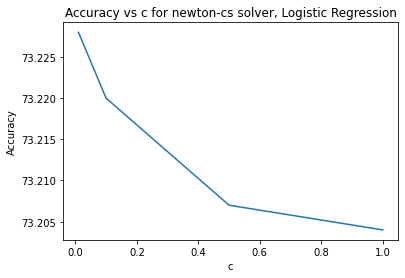

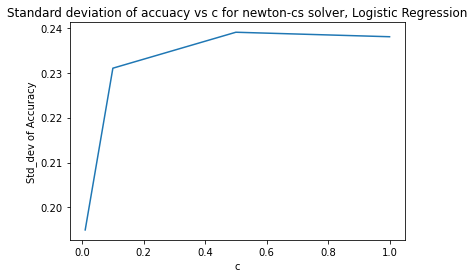

In [ ]:
print('Best hyerparameters from this grid-search turn out to be: \n Solver: {}\
       with L2 regularization and C = {} \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['sol'], best_params['C'], best_accuracy, best_std))

#bias-variance tradeoff 
x = [0.01, 0.1, 0.5, 1]
plt.plot(x, ACC)
plt.title('Accuracy vs c for newton-cs solver, Logistic Regression')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for newton-cs solver, Logistic Regression')
plt.xlabel('c')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#Best Logistic Regression model
model = LogisticRegression(penalty = 'l2', C = best_params['C'], solver = best_params['sol'], max_iter = 100, verbose = 0)
model.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Performance of best model on training set
predictions = model.predict(X_train_tfidf)
pred_proba = model.predict_proba(X_train_tfidf)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of best logistic regression model is {}%.'.format(train_acc*100))

Training Accuracy of best logistic regression model is 73.85130716773651%.


Validation Accuracy of best logistic regression model is 72.6539980783602%.


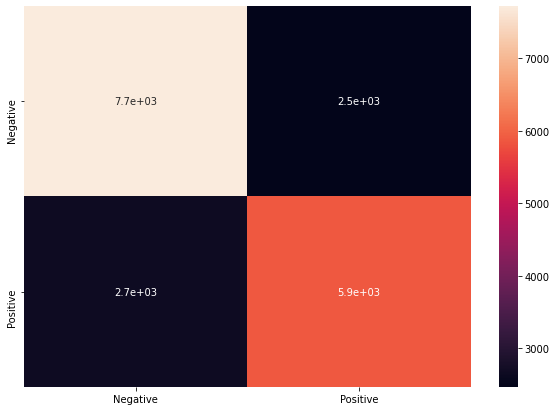

In [ ]:
#Performance of best model on validation set
predictions = model.predict(X_val_tfidf)
pred_proba = model.predict_proba(X_val_tfidf)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of best logistic regression model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

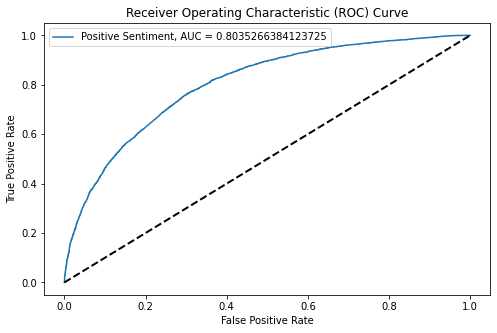

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(ii) kNN

kNN has a really long test time thus I would not be using kNN algorithm as a final model because it need to keep the entire training set which is large and has long test time.

In [ ]:
#Fitting a k-NN model
kNN = KNeighborsClassifier(n_neighbors=2)
kNN.fit(X_train_tfidf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
#Checking the model performance on validation set
#High test time for kNN
predictions = kNN.predict(X_val_tfidf)
#pred_proba = kNN.predict_proba(X_val_WF)

train_acc = ((predictions == y_val).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 80.0%.


Not doing hyper parameter tuning for kNN because its time consuming.

(iii) <b>Naive Bayes</b>

In [ ]:
#Fitting the Naive-Bayes model
NB = GaussianNB()
NB.fit(X_train_tfidf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Performance of the model on training set
predictions = NB.predict(X_train_tfidf)
pred_proba = NB.predict_proba(X_train_tfidf)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of Naive Bayes model is {}%.'.format(train_acc*100))

Training Accuracy of Naive Bayes model is 67.08392830928963%.


No hyperparametrs for naive Bayes model, therfore no tuning is required for this model.

In [ ]:
#Performance of the model on Validation set
predictions = NB.predict(X_val_tfidf)
pred_proba = NB.predict_proba(X_val_tfidf)

train_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation set Accuracy of Naive Bayes model is {}%.'.format(train_acc*100))

Validation set Accuracy of Naive Bayes model is 66.264545745703%.


(iv) <b>SVM (Support Vector Machine)</b>

[Note: SVM has other techniques like NuSVM and LinearSVM but for assignment I am only implementing standarf SVM which is SVC for classification.

In [ ]:
#Since SVC requires proper scaling
scalar = StandardScaler()
X_train_tfidf_scaled = scalar.fit_transform(X_train_tfidf)
X_val_tfidf_scaled = scalar.transform(X_val_tfidf)
X_test_tfidf_scaled = scalar.transform(X_test_tfidf)

#fitting a model
svm = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.1, max_iter = 1000)
svm.fit(X_train_tfidf_scaled, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Checking Performance of the model on training set
predictions = svm.predict(X_train_tfidf)
#No probability prediction for svm.svc

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 69.51943736404522%.


<b>Hyperparameter tuning</b>: Using grid search hyperparameter tuning to find the optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for SVC
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_tfidf_scaled)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
#for loss in ['hinge', 'log', 'perceptron']:
for pen in ['l2', 'l1', 'elasticnet']:
    for c in [0.01, 0.1, 1]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'l': 'hinge', 'pen': pen, 'c': c, 'max_iter': 1000}
      print('\n pen = {}, {} loss and c = {}\n'.format(hps['pen'], hps['l'], hps['c']))
      for train_idx, test_idx in kfolds.split(X_train_tfidf_scaled):
        x_t, x_te = X_train_tfidf_scaled[train_idx], X_train_tfidf_scaled[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        svc = SGDClassifier(loss = 'hinge', penalty = pen, alpha = c, max_iter = 1000)
        svc = svc.fit(x_t, y_t)
        
        predictions = svc.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for hinge loss with {} penalty, with C = {} : {}%({}%)".format(pen, c, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'pen': pen, 'C': c}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(pen == 'l2'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 pen = l2, hinge loss and c = 0.01

Fold: 1, Accuracy: 72.82978581437246%
Fold: 2, Accuracy: 72.82978581437246%
Fold: 3, Accuracy: 72.78975111763528%
Fold: 4, Accuracy: 73.20832777258775%
Fold: 5, Accuracy: 73.18163619378086%
Average Accuracy for hinge loss with l2 penalty, with C = 0.01 : 72.968%(0.186%)

 pen = l2, hinge loss and c = 0.1

Fold: 1, Accuracy: 72.94321745512778%
Fold: 2, Accuracy: 72.65630212851137%
Fold: 3, Accuracy: 72.64295722959898%
Fold: 4, Accuracy: 72.75457093287068%
Fold: 5, Accuracy: 73.24836514079807%
Average Accuracy for hinge loss with l2 penalty, with C = 0.1 : 72.849%(0.227%)

 pen = l2, hinge loss and c = 1

Fold: 1, Accuracy: 65.49009141255755%
Fold: 2, Accuracy: 67.93220791352506%
Fold: 3, Accuracy: 61.19303396276773%
Fold: 4, Accuracy: 60.8701454691045%
Fold: 5, Accuracy: 63.472574402775926%
Average Accuracy for hinge loss with l2 penalty, with C = 1 : 63.792%(2.662%)

 pen = l1, hinge loss and c = 0.01

Fold: 1, Accuracy: 70.69460198838993%
Fold: 2, 

Best hyerparameters from this grid-search turn out to be: 
        with l2 regularization with C = 0.01 for hinge loss 
 5-folds cross-validation score for this       model is: 72.96785734254975(0.1862131821843264)


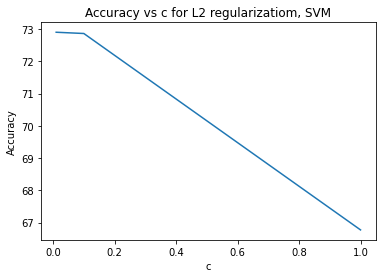

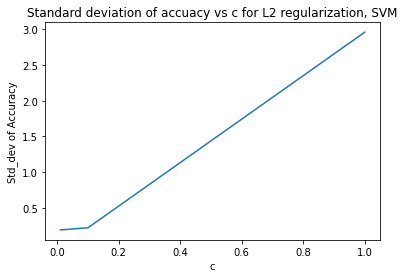

In [ ]:
print('Best hyerparameters from this grid-search turn out to be: \n \
       with {} regularization with C = {} for hinge loss \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['pen'], best_params['C'], best_accuracy, best_std))


#bias-variance tradeoff 
x = [0.01, 0.1, 1]
plt.plot(x, ACC)
plt.title('Accuracy vs c for L2 regularizatiom, SVM')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for L2 regularization, SVM')
plt.xlabel('c')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#Best SVC model
svc = SGDClassifier(loss = 'hinge', penalty = best_params['pen'], alpha = best_params['C'], max_iter = 1000)
svc.fit(X_train_tfidf_scaled, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Performance of best model on training set
predictions = svc.predict(X_train_tfidf_scaled)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of best SVC model is {}%.'.format(train_acc*100))

Training Accuracy of best SVC model is 73.73520344841393%.


Validation Accuracy of best logistic regression model is 72.55257820006406%.


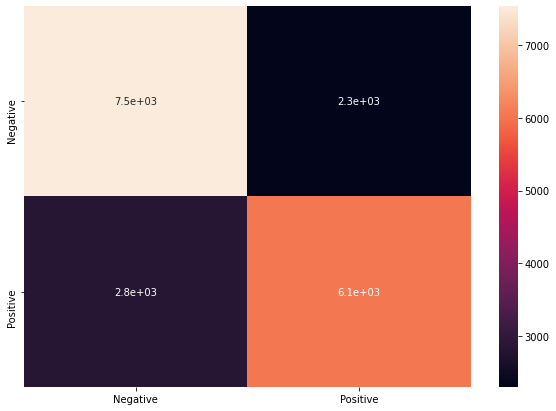

In [ ]:
#Performance of best model on validation set
predictions = svc.predict(X_val_tfidf_scaled)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of best logistic regression model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

SVC is giving 72% accuracy for validation set using tfidf as features.

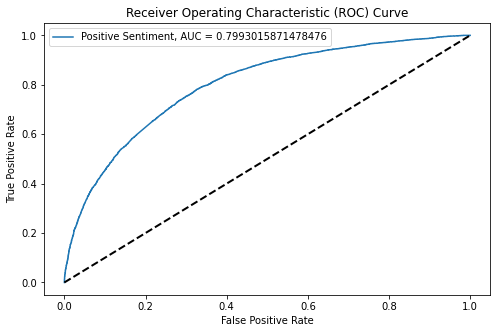

In [ ]:
score_roc = final_model.decision_function(X_val_tfidf_scaled)
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  score_roc)
auc = roc_auc_score(b_y_val, score_roc)
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)
plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(v) <b>Decision Tree</b>

In [ ]:
#fitting a model
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Checking Performance of the model on trainig set
predictions = dt.predict(X_train_tfidf)
pred_proba = dt.predict_proba(X_train_tfidf)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 61.75783700105427%.


<b>Hyperparameter tuning</b>: Using grid search hyperparameter tuning to find the optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for Decision Tree
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_tfidf)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for criterion in ['gini', 'entropy']:
    for depth in [5, 10, 50, 100, 200]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'max_depth': depth, 'c': criterion}
      print('\n criterion = {}, max depth = {}\n'.format(hps['c'], hps['max_depth']))
      for train_idx, test_idx in kfolds.split(X_train_tfidf):
        x_t, x_te = X_train_tfidf[train_idx], X_train_tfidf[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        dt = DecisionTreeClassifier(criterion = criterion, max_depth = depth)
        dt = dt.fit(x_t, y_t)
        
        predictions = dt.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for {} selection criterion, with max depth = {} : {}%({}%)".format(criterion, depth, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'c': criterion, 'max_depth': depth}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(criterion == 'gini'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 criterion = gini, max depth = 5

Fold: 1, Accuracy: 59.998665510108765%
Fold: 2, Accuracy: 59.9452859144592%
Fold: 3, Accuracy: 58.99112564222327%
Fold: 4, Accuracy: 58.86160416388629%
Fold: 5, Accuracy: 60.12278126251168%
Average Accuracy for gini selection criterion, with max depth = 5 : 59.584%(0.542%)

 criterion = gini, max depth = 10

Fold: 1, Accuracy: 61.760192166544336%
Fold: 2, Accuracy: 61.64008807633282%
Fold: 3, Accuracy: 60.99286047908187%
Fold: 4, Accuracy: 60.38969705058054%
Fold: 5, Accuracy: 61.94448151608167%
Average Accuracy for gini selection criterion, with max depth = 10 : 61.345%(0.575%)

 criterion = gini, max depth = 50

Fold: 1, Accuracy: 66.63775271902315%
Fold: 2, Accuracy: 65.97050777340363%
Fold: 3, Accuracy: 66.75118435977848%
Fold: 4, Accuracy: 66.22180701988523%
Fold: 5, Accuracy: 65.92819965300947%
Average Accuracy for gini selection criterion, with max depth = 50 : 66.302%(0.338%)

 criterion = gini, max depth = 100

Fold: 1, Accuracy: 67.158203776

Best hyerparameters from this grid-search turns out to be 
  entropy selection criterion        with max depth = 200 
 5-folds cross-validation score for this       model is: 67.73518543242838(0.3250105618230988)


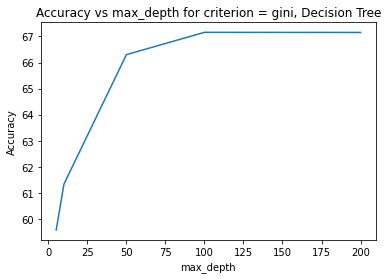

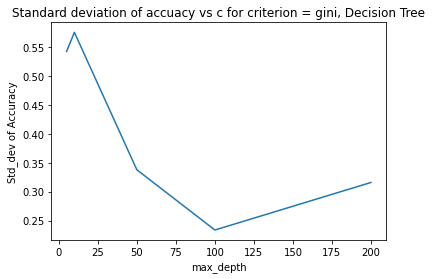

In [ ]:
print('Best hyerparameters from this grid-search turns out to be \n  {} selection criterion \
       with max depth = {} \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['c'], best_params['max_depth'], best_accuracy, best_std))

#bias-variance tradeoff 
x = [5, 10, 50, 100, 200]
plt.plot(x, ACC)
plt.title('Accuracy vs max_depth for criterion = gini, Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for criterion = gini, Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#fitting the selected model
dt = DecisionTreeClassifier(criterion = best_params['c'], max_depth = best_params['max_depth'])
dt = dt.fit(X_train_tfidf, y_train)

In [ ]:
#Performance of best model on training set
predictions = dt.predict(X_train_tfidf)
pred_proba = dt.predict_proba(X_train_tfidf)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of best SVC model is {}%.'.format(train_acc*100))

Training Accuracy of best SVC model is 81.71433146944604%.


Validation Accuracy of best Decision Tree model is 67.82320913846482%.


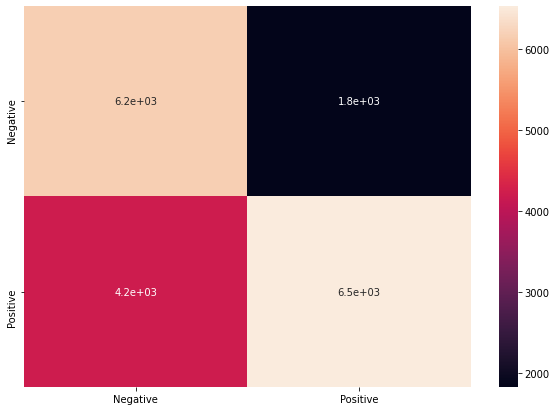

In [ ]:
#Performance of this model on the validation set
predictions = dt.predict(X_val_tfidf)
pred_proba = dt.predict_proba(X_val_tfidf)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Validation Accuracy of best Decision Tree model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

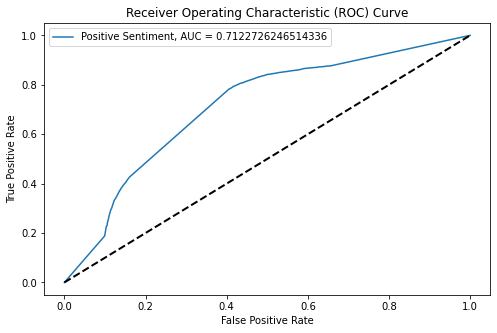

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(vi) <b>Random Forest Classifier</b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, criterion='gini')
rf.fit(X_train_tfidf, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Checking Performance of the model on training set
predictions = rf.predict(X_train_tfidf)
pred_proba = rf.predict_proba(X_train_tfidf)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 94.12675323288805%.


The model must be overfitting because of no max_dept constraint. We can reduce this overfitting variance and imporve the gneralization by using more estimators.

<b>Hyperparameter tuning</b>: Using oobscore find the optimal set of hyperparameters.


In [ ]:
ACC_score_gini = []
ACC_score_entropy = []

for criterion in ['gini', 'entropy']:
    for n in [10, 20, 50, 100]:
      rf = RandomForestClassifier(n_estimators = n, criterion=criterion, bootstrap=True, oob_score =True)
      rf = rf.fit(X_train_tfidf, y_train)
      if criterion == 'gini':
        ACC_score_gini.append(rf.oob_score_)
      elif criterion == 'entropy':
        ACC_score_entropy.append(rf.oob_score_)
      print('For selection criterion {} and number of estimators {} the OOB error is {}'.format(criterion, n, rf.oob_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 10 the OOB error is 0.6901899029799955


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 20 the OOB error is 0.7003456421069488
For selection criterion gini and number of estimators 50 the OOB error is 0.7119426687841138
For selection criterion gini and number of estimators 100 the OOB error is 0.7141046001094311


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 10 the OOB error is 0.690590260632832


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 20 the OOB error is 0.702213977820186
For selection criterion entropy and number of estimators 50 the OOB error is 0.7137709687320674
For selection criterion entropy and number of estimators 100 the OOB error is 0.717467604393258


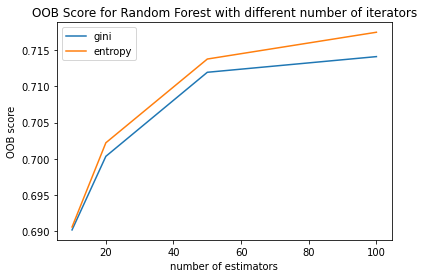

In [ ]:
#plotting the oob scores
x = [10, 20, 50, 100]
plt.plot(x, ACC_score_gini, label = 'gini')
plt.plot(x, ACC_score_entropy, label = 'entropy')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

In [ ]:
#Choosing the model with the best OOB score and easy to fit model since there is not a lot of increase in OOB score
n = 50
c = 'gini'
rf = RandomForestClassifier(n_estimators = n, criterion=criterion)
rf = rf.fit(X_train_tfidf, y_train)

#Checking the models performance on the training set
predictions = rf.predict(X_train_tfidf)
#pred_proba = rf.predict_proba(X_train_WF)

train_acc = ((predictions == y_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 94.09205556964221%.


Training Accuracy of the model is 71.8266253869969%.


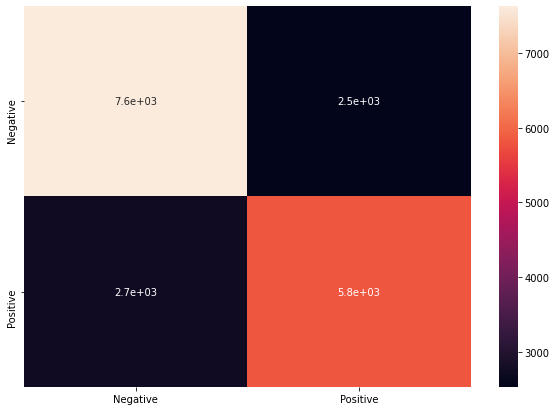

In [ ]:
#Checking the models performance on the validation set set
predictions = rf.predict(X_val_tfidf)
pred_proba = rf.predict_proba(X_val_tfidf)

val_acc = ((predictions == y_val).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(val_acc*100))

classes = np.unique(y_val)
cm = confusion_matrix(predictions, y_val, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.show()

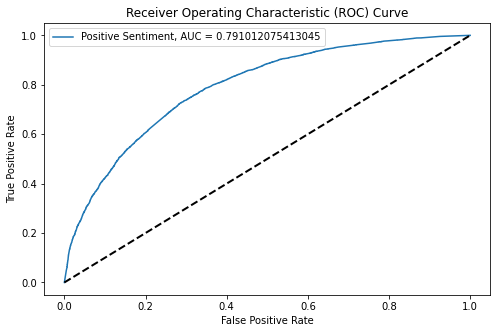

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in y_val:
  if(target == 'Negative'):
    b_y_val.append(0)
  else:
    b_y_val.append(1)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

Accuracy scores for all the fitted models after tuning and Using Validation accuracy to decide the final selected model.

|Model | WF (Training set)| WF (Validation set)|Tfidf (Training set)|Tfidf (Validation set)|
| --- | --- | --- | --- | --- |
| Logistic Regression | 73.68 | 72.84 | 73.85 | 72.65|
| Naive Bayes | 67.08 | 66.26 | 67.08 | 66.26|
| SVC | 71.36 | 65.71 | 73.67 | 72.31|
| Decision Tree | 81.727 | 67.737 | 81.70| 67.87 |
| Random Forest | 94.125 | 71.725 | 94.097 | 71.62|

Since the random forest and DT has comprably high training accuracy compare to validation accuracy the models can be considered overfitting the training dataset.

Therefore selecting SVM (<i>hinge loss, L2, alpha = 0.01</i>) or Logistic Regression model (<i> newton-cg, c = 0.01, L2</i>) for tf-idf because of the simplicity of the model and the closeness of training and testing error for the model demonstrates better generalization. 

In [ ]:
#Using the best model to get the test accuracy
final_model = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.01, max_iter = 1000)
final_model.fit(X_train_tfidf_scaled, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

<b>Testing</b> on test set 

Finally using the test set.

In [ ]:
#Since SVC requires proper scaling
scalar = StandardScaler()
X_train_tfidf_scaled = scalar.fit_transform(X_train_tfidf)
X_val_tfidf_scaled = scalar.transform(X_val_tfidf)
X_test_tfidf_scaled = scalar.transform(X_test_tfidf)

In [ ]:
#Already have scaled X_train
predictions = final_model.predict(X_test_tfidf_scaled)

test_acc = ((predictions == y_test).sum())/len(predictions)
print('Test Accuracy of the model is {}%.'.format(test_acc*100))

Test Accuracy of the model is 72.62106416899164%.


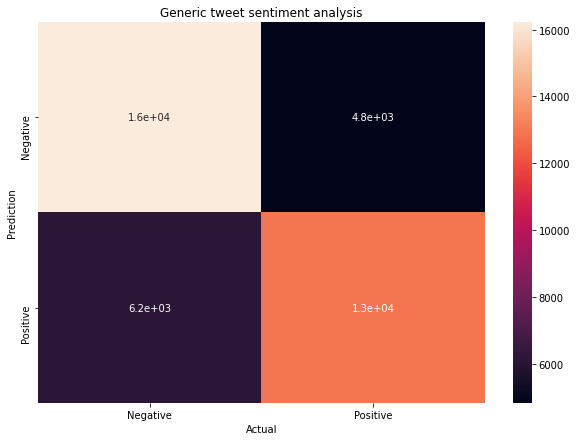

In [ ]:
classes = np.unique(y_test)
cm = confusion_matrix(predictions, y_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Generic tweet sentiment analysis')
plt.show()

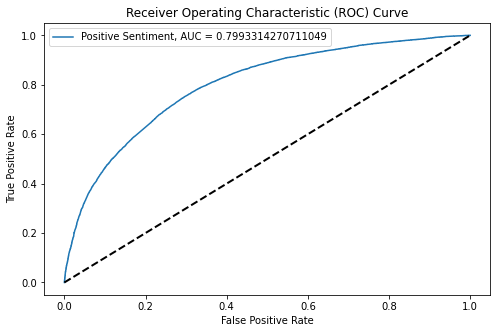

In [ ]:
score_roc = final_model.decision_function(X_test_tfidf_scaled)
#Plotting ROC curve
b_y_test = []
for target in y_test:
  if(target == 'Negative'):
    b_y_test.append(0)
  else:
    b_y_test.append(1)
fpr, tpr, _ = roc_curve(b_y_test,  score_roc)
auc = roc_auc_score(b_y_test, score_roc)
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

<b>Using the election dataset</b> 

First seeing the overall classification accuracy on the election dataset.

In [ ]:
X = df_test['cln_tweets'].values.tolist()
y = df_test['sentiment'].values.tolist()

In [ ]:
#Now transforming and scaling the X (i.e. tweets)
X_tfidf = vectorizer_.transform(X).toarray()
X_tfidf_scaled = scalar.transform(X_tfidf)

In [ ]:
#Already have scaled X
predictions = final_model.predict(X_tfidf_scaled)

test_acc = ((predictions == y).sum())/len(predictions)
print('Test Accuracy of the model on election dataset is {}%.'.format(test_acc*100))

Test Accuracy of the model on election dataset is 58.93108298171589%.


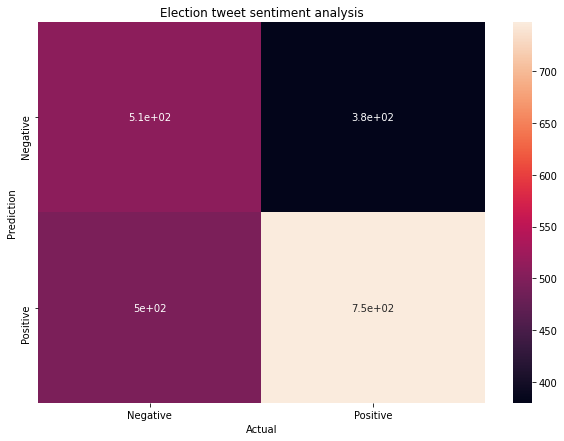

In [ ]:
classes = np.unique(y)
cm = confusion_matrix(predictions, y, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Election tweet sentiment analysis')
plt.show()

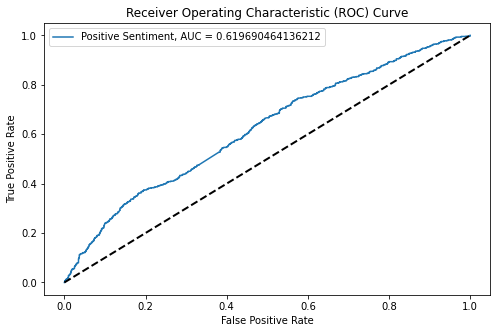

In [ ]:
score_roc = final_model.decision_function(X_tfidf_scaled)
#Plotting ROC curve
b_y = []
for target in y:
  if(target == 'Negative'):
    b_y.append(0)
  else:
    b_y.append(1)
fpr, tpr, _ = roc_curve(b_y,  score_roc)
auc = roc_auc_score(b_y, score_roc)
label = 'Positive Sentiment, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

This lower accuracy can be a result of different vocabulary. The generic tweets were more general and as a result has different words than what are there in election related tweets.

Now doing a party-wise check for number of actual and predicted sentiment types.

In [ ]:
#Grouping tweets based on party
party_list = []
tweets_no_party_list = []
no_party_sentiment = []
liberal_tweets = []
liberal_sentiment = []
conservative_tweets = []
conservative_sentiment = []
ndp_tweets = []
ndp_sentiment = []

for i in range(len(df_test)):   
  party_determinant = party_name(df_test['cln_tweets'][i], df_test['@ and # tags'][i])
  party_list.append(party_determinant)
  if party_determinant == 'Liberal':
    liberal_tweets.append(df_test['cln_tweets'][i])
    liberal_sentiment.append(df_test['sentiment'][i])
  elif party_determinant == 'Conservative':
    conservative_tweets.append(df_test['cln_tweets'][i])
    conservative_sentiment.append(df_test['sentiment'][i])
  elif party_determinant == 'NDP':
    ndp_tweets.append(df_test['cln_tweets'][i])
    ndp_sentiment.append(df_test['sentiment'][i])
  elif party_determinant == 'Other':
    tweets_no_party_list.append(df_test['cln_tweets'][i])
    no_party_sentiment.append(df_test['sentiment'][i])

(a) <b>Liberal Party Tweet</b> sentiment analysis

In [ ]:
liberal_tfidf = vectorizer_.transform(liberal_tweets).toarray()
liberal_tfidf_scaled = scalar.transform(liberal_tfidf)

In [ ]:
#Prediction on liberal tweets
predictions = final_model.predict(liberal_tfidf_scaled)

liberal_acc = ((predictions == liberal_sentiment).sum())/len(predictions)
print('Test Accuracy of the model on election dataset for Liberal party related tweets is {}%.'.format(liberal_acc*100))

Test Accuracy of the model on election dataset for Liberal party related tweets is 54.019292604501615%.


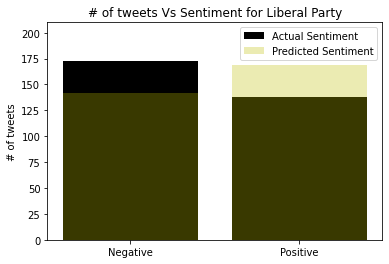

In [ ]:
label, counts = np.unique(liberal_sentiment, return_counts=True)
label, counts_predictions = np.unique(predictions, return_counts=True)
ticks = range(len(counts))

plt.ylim(0, 210)
plt.bar(ticks, counts, align='center', color = 'k', label = 'Actual Sentiment')
plt.bar(ticks, counts_predictions, align='center', color = 'y', alpha=0.3 ,label = 'Predicted Sentiment')
plt.xticks(ticks, labels)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs Sentiment for Liberal Party')
plt.show()

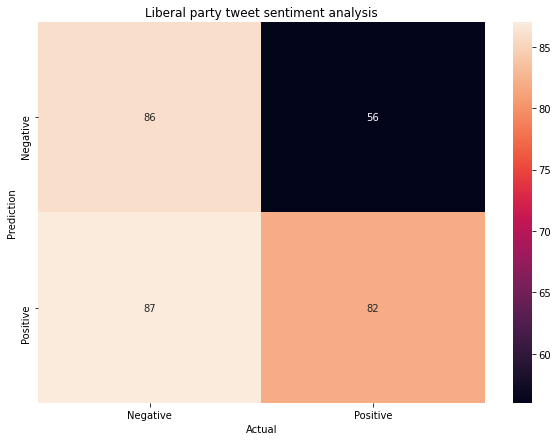

In [ ]:
#Plotting the confusion matrix
classes = np.unique(liberal_sentiment)
cm = confusion_matrix(predictions, liberal_sentiment, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Liberal party tweet sentiment analysis')
plt.show()

Ovreall the predicted number of positive sentiment tweets for Liberal party were close to number of negative sentiment tweets. Therefor I would expect the # of votes for the Liberal Party to remain unaffected or increase slightly.

(b) <b>Conservative Party tweet</b> sentiment analysis

In [ ]:
cons_tfidf = vectorizer_.transform(conservative_tweets).toarray()
cons_tfidf_scaled = scalar.transform(cons_tfidf)

In [ ]:
#Prediction on liberal tweets
predictions = final_model.predict(cons_tfidf_scaled)

cons_acc = ((predictions == conservative_sentiment).sum())/len(predictions)
print('Test Accuracy of the model on election dataset for Conservative party related tweets is {}%.'.format(cons_acc*100))

Test Accuracy of the model on election dataset for Conservative party related tweets is 56.779661016949156%.


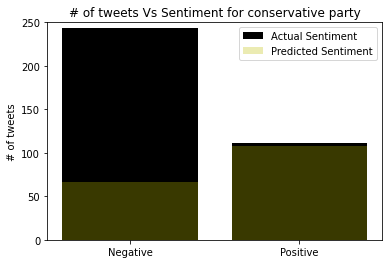

In [ ]:
label, counts = np.unique(conservative_sentiment, return_counts=True)
label, counts_predictions = np.unique(predictions, return_counts=True)
ticks = range(len(counts))

plt.ylim(0, 250)
plt.bar(ticks, counts, align='center', color = 'k', label = 'Actual Sentiment')
plt.bar(ticks, counts_predictions, align='center', color = 'y', alpha=0.3 ,label = 'Predicted Sentiment')
plt.xticks(ticks, labels)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs Sentiment for conservative party')
plt.show()

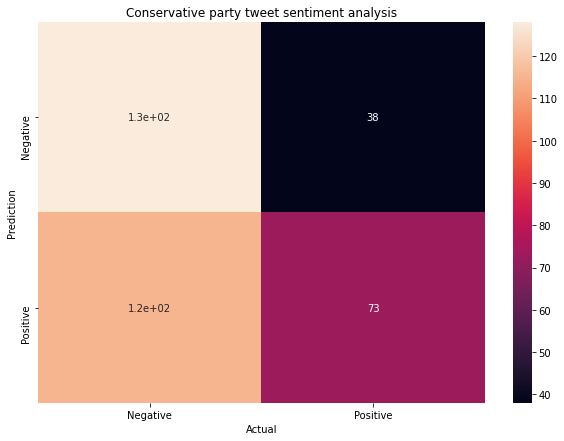

In [ ]:
#Plotting the confusion matrix
classes = np.unique(conservative_sentiment)
cm = confusion_matrix(predictions, conservative_sentiment, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Conservative party tweet sentiment analysis')
plt.show()

Ovreall the predicted number of positive sentiment tweets for Conservative party were more than the number of negative sentiment tweets. Therefor I would expect the # of votes for the Conservative Party would increase slightly.

But actuallt the numbrer of negative sentiment tweeets are more than positive and number of votes for them should deacrease.

In [ ]:
ndp_tfidf = vectorizer_.transform(ndp_tweets).toarray()
ndp_tfidf_scaled = scalar.transform(ndp_tfidf)

In [ ]:
#Prediction on liberal tweets
predictions = final_model.predict(ndp_tfidf_scaled)

ndp_acc = ((predictions == ndp_sentiment).sum())/len(predictions)
print('Test Accuracy of the model on election dataset for Conservative party related tweets is {}%.'.format(ndp_acc*100))

Test Accuracy of the model on election dataset for Conservative party related tweets is 64.9425287356322%.


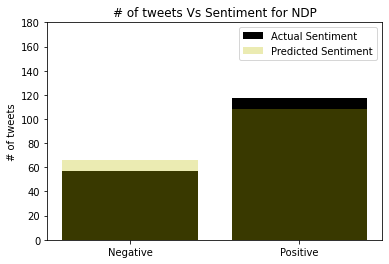

In [ ]:
label, counts = np.unique(ndp_sentiment, return_counts=True)
label, counts_predictions = np.unique(predictions, return_counts=True)
ticks = range(len(counts))

plt.ylim(0, 180)
plt.bar(ticks, counts, align='center', color = 'k', label = 'Actual Sentiment')
plt.bar(ticks, counts_predictions, align='center', color = 'y', alpha=0.3 ,label = 'Predicted Sentiment')
plt.xticks(ticks, labels)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs Sentiment for NDP')
plt.show()

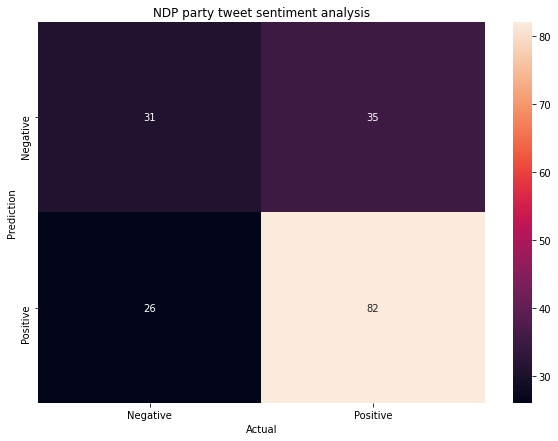

In [ ]:
#Plotting the confusion matrix
classes = np.unique(ndp_sentiment)
cm = confusion_matrix(predictions, ndp_sentiment, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('NDP party tweet sentiment analysis')
plt.show()

Ovreall the predicted number of positive sentiment tweets for NDP party were greater than the numbee of negative sentiment tweets. Therefor I would expect the # of votes for the NDP Party to increase slightly.

<h3>Multiclass classification</h3> 

To get the reason for negative sentiment in the canadian election tweets.

In [ ]:
df1 = df_test[df_test['sentiment'] == 'Negative'] #Splitting the dataframe

In [ ]:
X_n = df1['cln_tweets'].values.tolist()
y_n =  df1['negative_reason'].values.tolist()

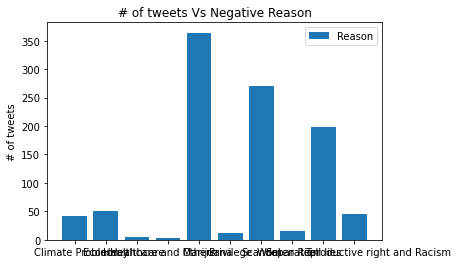

In [ ]:
label, counts = np.unique(y_n, return_counts=True)
ticks = range(len(counts))

plt.figure
plt.bar(ticks, counts, align='center', label = 'Reason')
plt.xticks(ticks, label)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs Negative Reason')
plt.show()

Grouping to make the set more balanced.

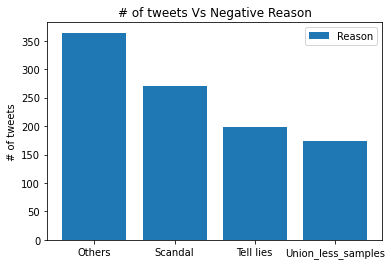

In [ ]:
#There are 3 negative reasons with a lot of examples and others have significantly less number of examples

#Therefor grouping everything with <100 number of examples
#i.e. grouping ['Climate Problem', 'Economy', 'Healthcare', 'Healthcare and Marijuana', 'Privilege', 'Separation', 'Women Reproductive right and Racism'] 
#into another group called union for less #number of examples
l = ['Climate Problem', 'Economy', 'Healthcare', 'Healthcare and Marijuana',\
     'Privilege', 'Separation', 'Women Reproductive right and Racism']
for i in range(len(y_n)):
  if y_n[i] in l:
    y_n[i] = 'Union_less_samples'

label, counts = np.unique(y_n, return_counts=True)
ticks = range(len(counts))

plt.figure
plt.bar(ticks, counts, align='center', label = 'Reason')
plt.xticks(ticks, label)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs Negative Reason')
plt.show()

Since these are categorical class we can use any of the multiclass classification algorithm to classify them.

First using tf-idf to vectorize the tweets after splitting it into training and test set.

In [ ]:
y_n = np.asarray(y_n)

# create training and testing vars
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.3, shuffle = True)

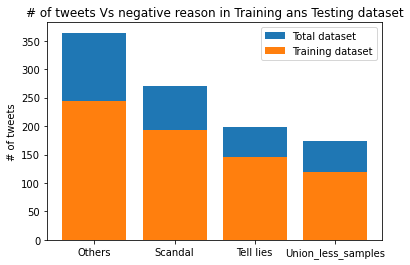

In [ ]:
#Ensuring that the dataset is more or less balanced in the data-set.
#plot a histogram for the split
labels, counts = np.unique(y_n, return_counts=True)
ticks = range(len(counts))

labels, counts_train = np.unique(yn_train, return_counts=True)

plt.bar(ticks, counts, align='center', label = 'Total dataset')
plt.bar(ticks, counts_train, align='center', label = 'Training dataset')
plt.xticks(ticks, labels)
plt.ylabel('# of tweets')
plt.legend()
plt.title('# of tweets Vs negative reason in Training ans Testing dataset')
plt.show()

In [ ]:
vectorizer_ = TfidfVectorizer(min_df = 0.01, use_idf=True, smooth_idf=True, norm=None)
Xn_train_tfidf = vectorizer_.fit_transform(Xn_train).toarray()

In [ ]:
print('The number of words in the ditionary is {}'.format(len(vectorizer_.get_feature_names())))
print('Shape of training set with word frequency is {}'.format(Xn_train_tfidf.shape))

The number of words in the ditionary is 256
Shape of training set with word frequency is (704, 256)


In [ ]:
#Fitting this tfidf transformation to training and validation set.
Xn_test_tfidf = vectorizer_.transform(Xn_test).toarray()

<b>Used Algorithms for multiclass classification</b>

- (i) Logistic Regression
- (ii) Decision Trees
- (iii) Random Forest



(i)<b>Logistic Regression</b>

In [ ]:
#fitting a model
model = LogisticRegression(C = 0.5, solver ='lbfgs', max_iter = 100, verbose = 0)
model.fit(Xn_train_tfidf, yn_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Checking Performance of the model on trainig set
predictions = model.predict(Xn_train_tfidf)
pred_proba = model.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 96.02272727272727%.


<b>Hyperparameter tuning</b>: Using grid search to find optimal set of hyperparameters.

In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for Logistic Regression
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(Xn_train_tfidf)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for solver in ['lbfgs']:
    for c in [0.01, 0.1, 0.5, 1]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'pen' : 'l2', 'sol': solver, 'c': c, 'max_iter': 100}
      print('\n c = {}, solver = {}\n'.format(hps['c'], hps['sol']))
      for train_idx, test_idx in kfolds.split(Xn_train_tfidf):
        x_t, x_te = Xn_train_tfidf[train_idx], Xn_train_tfidf[test_idx]
        y_t, y_te = yn_train[train_idx], yn_train[test_idx]
        model = LogisticRegression(penalty = 'l2', C = c, solver = solver, max_iter = 100, verbose = 0)
        model = model.fit(x_t, y_t)
        
        predictions = model.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for {} solver, {} penalty with C = {} : {}%({}%)".format(solver, 'L2', c, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'sol': solver, 'C': c}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      
      ACC.append(round(np.mean(accuracy),3))
      STD.append(round(np.std(accuracy),3))


 c = 0.01, solver = lbfgs

Fold: 1, Accuracy: 58.86524822695035%
Fold: 2, Accuracy: 57.446808510638306%
Fold: 3, Accuracy: 61.702127659574465%
Fold: 4, Accuracy: 51.06382978723404%
Fold: 5, Accuracy: 49.28571428571429%
Average Accuracy for lbfgs solver, L2 penalty with C = 0.01 : 55.673%(4.727%)

 c = 0.1, solver = lbfgs

Fold: 1, Accuracy: 51.77304964539007%
Fold: 2, Accuracy: 53.191489361702125%
Fold: 3, Accuracy: 56.73758865248227%
Fold: 4, Accuracy: 43.262411347517734%
Fold: 5, Accuracy: 48.57142857142857%
Average Accuracy for lbfgs solver, L2 penalty with C = 0.1 : 50.707%(4.553%)

 c = 0.5, solver = lbfgs

Fold: 1, Accuracy: 48.93617021276596%
Fold: 2, Accuracy: 51.06382978723404%
Fold: 3, Accuracy: 49.645390070921984%
Fold: 4, Accuracy: 43.262411347517734%
Fold: 5, Accuracy: 44.285714285714285%
Average Accuracy for lbfgs solver, L2 penalty with C = 0.5 : 47.439%(3.087%)

 c = 1, solver = lbfgs

Fold: 1, Accuracy: 48.93617021276596%
Fold: 2, Accuracy: 50.35460992907801%
Fold: 3,

Best hyerparameters from this grid-search turn out to be: 
 Solver: lbfgs       with L2 regularization and C = 0.01 
 5-folds cross-validation score for this       model is: 55.67274569402228(4.727136431987891)


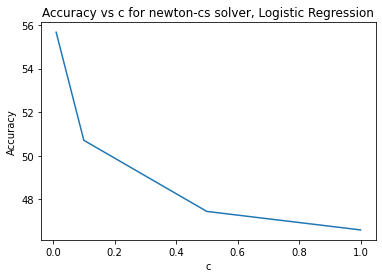

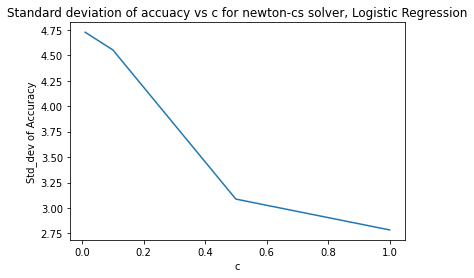

In [ ]:
print('Best hyerparameters from this grid-search turn out to be: \n Solver: {}\
       with L2 regularization and C = {} \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['sol'], best_params['C'], best_accuracy, best_std))

#bias-variance tradeoff 
x = [0.01, 0.1, 0.5, 1]
plt.plot(x, ACC)
plt.title('Accuracy vs c for newton-cs solver, Logistic Regression')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs c for newton-cs solver, Logistic Regression')
plt.xlabel('c')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#Best Logistic Regression model
model = LogisticRegression(penalty = 'l2', C = best_params['C'], solver = best_params['sol'], max_iter = 100, verbose = 0)
model.fit(Xn_train_tfidf, yn_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Performance of best model on training set
predictions = model.predict(Xn_train_tfidf)
pred_proba = model.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of best logistic regression model is {}%.'.format(train_acc*100))

Training Accuracy of best logistic regression model is 77.27272727272727%.


Training Accuracy of best logistic regression model is 77.27272727272727%.


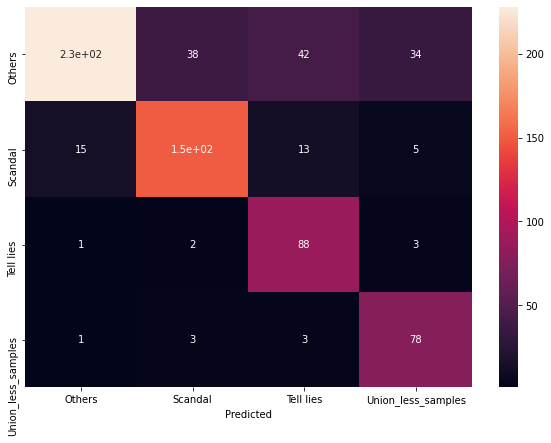

In [ ]:
#Performance of best model on Training set
predictions = model.predict(Xn_train_tfidf)
pred_proba = model.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of best logistic regression model is {}%.'.format(train_acc*100))

classes = np.unique(yn_train)
cm = confusion_matrix(predictions, yn_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Training Set')
plt.show()

In [ ]:
#Performance of best model on test set
predictions = model.predict(Xn_test_tfidf)
pred_proba = model.predict_proba(Xn_test_tfidf)

test_acc = ((predictions == yn_test).sum())/len(predictions)
print('Test Accuracy of best logistic regression model is {}%.'.format(test_acc*100))

Test Accuracy of best logistic regression model is 59.27152317880795%.


Test Accuracy of best logistic regression model is 59.27152317880795%.


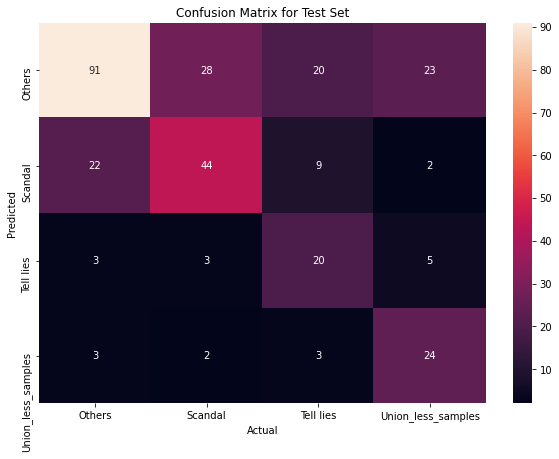

In [ ]:
test_acc = ((predictions == yn_test).sum())/len(predictions)
print('Test Accuracy of best logistic regression model is {}%.'.format(test_acc*100))

classes = np.unique(yn_test)
cm = confusion_matrix(predictions, yn_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Test Set')
plt.show()

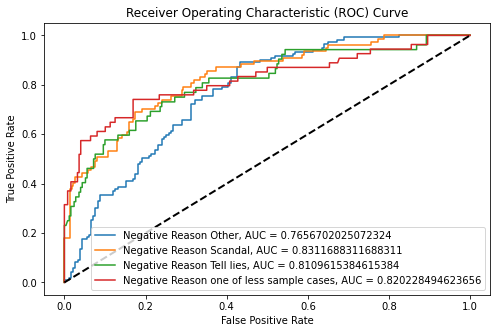

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in yn_test:
  if(target == 'Others'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 0])
auc = roc_auc_score(b_y_val, pred_proba[:, 0])
label = 'Negative Reason Other, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)


b_y_val = []
for target in yn_test:
  if(target == 'Scandal'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Negative Reason Scandal, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Tell lies'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 2])
auc = roc_auc_score(b_y_val, pred_proba[:, 2])
label = 'Negative Reason Tell lies, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Union_less_samples'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 3])
auc = roc_auc_score(b_y_val, pred_proba[:, 3])
label = 'Negative Reason one of less sample cases, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(ii)<b>Decision Trees</b>

In [ ]:
#fitting a model
dt = DecisionTreeClassifier(criterion = 'gini', max_depth= 5)
dt.fit(Xn_train_tfidf, yn_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Performance of on training set
predictions = dt.predict(Xn_train_tfidf)
pred_proba = dt.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of Decision Tree model is {}%.'.format(train_acc*100))

Training Accuracy of Decision Tree model is 53.55113636363637%.


In [ ]:
#Using 5-fold cross validation to tune the hyperparameter for Decision Tree
scalar = StandardScaler()
kfolds = KFold(n_splits = 5)
kfolds.get_n_splits(X_train_tfidf)

best_params = {}
best_accuracy = 0
best_std = 0
ACC = []
STD = []
for criterion in ['gini', 'entropy']:
    for depth in [2, 5, 10, 15, 20]:
      accuracy = np.zeros(5)
      np_idx = 0
      hps = {'max_depth': depth, 'c': criterion}
      print('\n criterion = {}, max depth = {}\n'.format(hps['c'], hps['max_depth']))
      for train_idx, test_idx in kfolds.split(X_train_tfidf):
        x_t, x_te = X_train_tfidf[train_idx], X_train_tfidf[test_idx]
        y_t, y_te = y_train[train_idx], y_train[test_idx]
        dt = DecisionTreeClassifier(criterion = criterion, max_depth = depth)
        dt = dt.fit(x_t, y_t)
        
        predictions = dt.predict(x_te)
        correct_pred = 0
        for i in range(0, len(predictions)):
          if(predictions[i] == y_te[i]):
            correct_pred += 1
        accuracy[np_idx] = correct_pred/len(predictions)*100
        print('Fold: {}, Accuracy: {}%'.format(np_idx+1, accuracy[np_idx]))
        np_idx += 1

      print ("Average Accuracy for {} selection criterion, with max depth = {} : {}%({}%)".format(criterion, depth, round(np.mean(accuracy),3),round(np.std(accuracy),3)))
      if np.mean(accuracy) > best_accuracy:
          best_params = {'c': criterion, 'max_depth': depth}
          best_accuracy = np.mean(accuracy)
          best_std = np.std(accuracy)
      if(criterion == 'gini'):
          ACC.append(round(np.mean(accuracy),3))
          STD.append(round(np.std(accuracy),3))


 criterion = gini, max depth = 2

Fold: 1, Accuracy: 58.31720824714752%
Fold: 2, Accuracy: 58.2104490558484%
Fold: 3, Accuracy: 57.40308267164876%
Fold: 4, Accuracy: 57.380221540104095%
Fold: 5, Accuracy: 58.20766048311757%
Average Accuracy for gini selection criterion, with max depth = 2 : 57.904%(0.42%)

 criterion = gini, max depth = 5

Fold: 1, Accuracy: 59.998665510108765%
Fold: 2, Accuracy: 59.9452859144592%
Fold: 3, Accuracy: 58.98445319276706%
Fold: 4, Accuracy: 58.86160416388629%
Fold: 5, Accuracy: 60.12278126251168%
Average Accuracy for gini selection criterion, with max depth = 5 : 59.583%(0.543%)

 criterion = gini, max depth = 10

Fold: 1, Accuracy: 61.760192166544336%
Fold: 2, Accuracy: 61.64676052578901%
Fold: 3, Accuracy: 61.01287782745046%
Fold: 4, Accuracy: 60.41638862938743%
Fold: 5, Accuracy: 61.91778993727479%
Average Accuracy for gini selection criterion, with max depth = 10 : 61.351%(0.559%)

 criterion = gini, max depth = 15

Fold: 1, Accuracy: 62.4274371121638

Best hyerparameters from this grid-search turns out to be 
  gini selection criterion        with max depth = 20 
 5-folds cross-validation score for this       model is: 63.2231417145894(0.5148904068248461)


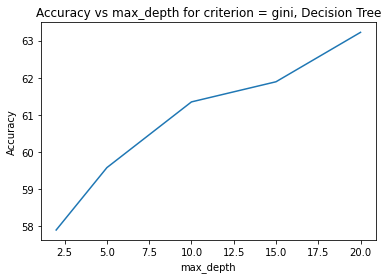

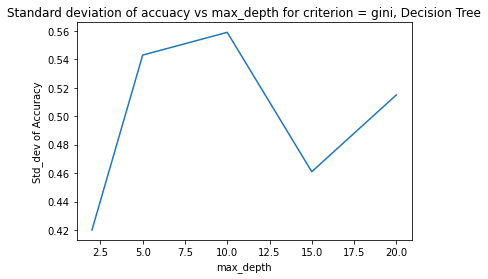

In [ ]:
print('Best hyerparameters from this grid-search turns out to be \n  {} selection criterion \
       with max depth = {} \n 5-folds cross-validation score for this\
       model is: {}({})'.format(best_params['c'], best_params['max_depth'], best_accuracy, best_std))

#bias-variance tradeoff 
x = [2, 5, 10, 15, 20]
plt.plot(x, ACC)
plt.title('Accuracy vs max_depth for criterion = gini, Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

plt.plot(x, STD)
plt.title('Standard deviation of accuacy vs max_depth for criterion = gini, Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Std_dev of Accuracy')
plt.show()

In [ ]:
#fitting the selected model
dt = DecisionTreeClassifier(criterion = best_params['c'], max_depth = best_params['max_depth'])
dt = dt.fit(Xn_train_tfidf, yn_train)

In [ ]:
#Performance of best model on training set
predictions = dt.predict(Xn_train_tfidf)
pred_proba = dt.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of best DT model is {}%.'.format(train_acc*100))

Training Accuracy of best DT model is 74.14772727272727%.


Test Accuracy of best Decision Tree model is 74.14772727272727%.


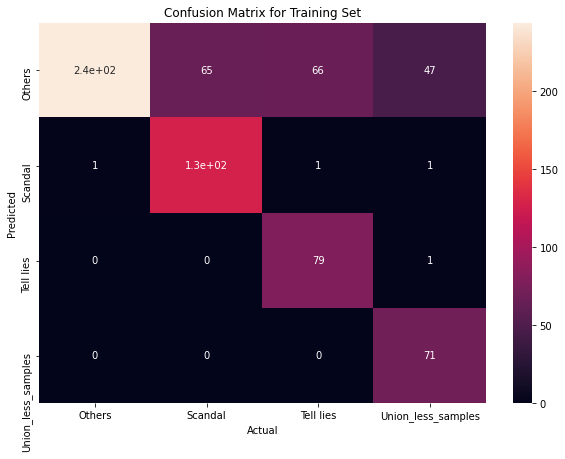

In [ ]:
#Performance of this model on the training set
predictions = dt.predict(Xn_train_tfidf)
pred_proba = dt.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of best Decision Tree model is {}%.'.format(train_acc*100))

classes = np.unique(yn_train)
cm = confusion_matrix(predictions, yn_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Training Set')
plt.show()

Test Accuracy of best Decision Tree model is 63.90728476821192%.


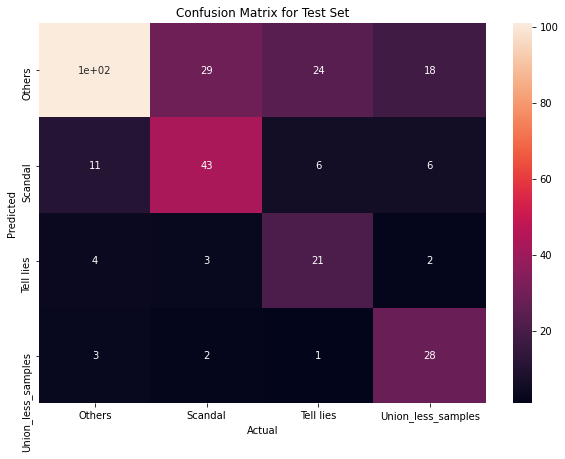

In [ ]:
#Performance of this model on the test set
predictions = dt.predict(Xn_test_tfidf)
pred_proba = dt.predict_proba(Xn_test_tfidf)

test_acc = ((predictions == yn_test).sum())/len(predictions)
print('Test Accuracy of best Decision Tree model is {}%.'.format(test_acc*100))

classes = np.unique(yn_test)
cm = confusion_matrix(predictions, yn_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Test Set')
plt.show()

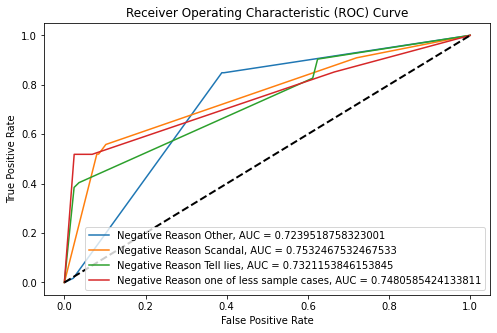

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in yn_test:
  if(target == 'Others'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)

fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 0])
auc = roc_auc_score(b_y_val, pred_proba[:, 0])
label = 'Negative Reason Other, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Scandal'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Negative Reason Scandal, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Tell lies'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 2])
auc = roc_auc_score(b_y_val, pred_proba[:, 2])
label = 'Negative Reason Tell lies, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Union_less_samples'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 3])
auc = roc_auc_score(b_y_val, pred_proba[:, 3])
label = 'Negative Reason one of less sample cases, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

(iii)<b>Random Forest</b>

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, criterion='gini', max_depth= 5)
rf.fit(Xn_train_tfidf, yn_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Checking Performance of the model on training set
predictions = rf.predict(Xn_train_tfidf)
pred_proba = rf.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

Training Accuracy of the model is 56.81818181818182%.


The model must be overfitting because of no max_dept constraint. We can reduce this overfitting variance and imporve the gneralization by using more estimators.

<b>Hyperparameter tuning</b>: Using oobscore find the optimal set of hyperparameters.


In [ ]:
ACC_score_gini = []
ACC_score_entropy = []

for criterion in ['gini', 'entropy']:
    for n in [2, 4, 8, 10, 15]:
      rf = RandomForestClassifier(n_estimators = n, criterion=criterion, max_depth = 5, bootstrap=True, oob_score =True)
      rf = rf.fit(X_train_tfidf, y_train)
      if criterion == 'gini':
        ACC_score_gini.append(rf.oob_score_)
      elif criterion == 'entropy':
        ACC_score_entropy.append(rf.oob_score_)
      print('For selection criterion {} and number of estimators {} the OOB error is {}'.format(criterion, n, rf.oob_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 2 the OOB error is 0.5721511216686906


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 4 the OOB error is 0.5830408498258445


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 8 the OOB error is 0.5833744812032082


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 10 the OOB error is 0.5980409165521199


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion gini and number of estimators 15 the OOB error is 0.599375442061575


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 2 the OOB error is 0.5663192451923719


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 4 the OOB error is 0.5755541617178013


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 8 the OOB error is 0.567920675803718


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For selection criterion entropy and number of estimators 10 the OOB error is 0.5872712956908172
For selection criterion entropy and number of estimators 15 the OOB error is 0.6067286776186727


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


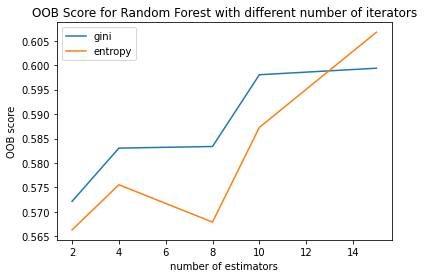

In [ ]:
#plotting the oob scores
x = [2, 4, 8, 10, 15]
plt.plot(x, ACC_score_gini, label = 'gini')
plt.plot(x, ACC_score_entropy, label = 'entropy')
plt.ylabel('OOB score')
plt.xlabel('number of estimators')
plt.title('OOB Score for Random Forest with different number of iterators')
plt.legend()
plt.show()

In [ ]:
#Choosing the model with the best OOB score and easy to fit model since there is not a lot of increase in OOB score
n = 10
c = 'gini'
rf = RandomForestClassifier(n_estimators = n, criterion=criterion, max_depth = 5)
rf = rf.fit(Xn_train_tfidf, yn_train)

#Checking the models performance on the training set
predictions = rf.predict(Xn_train_tfidf)
#pred_proba = rf.predict_proba(X_train_WF)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of selected Random Forest is {}%.'.format(train_acc*100))

Training Accuracy of selected Random Forest is 55.11363636363637%.


Training Accuracy of the model is 55.11363636363637%.


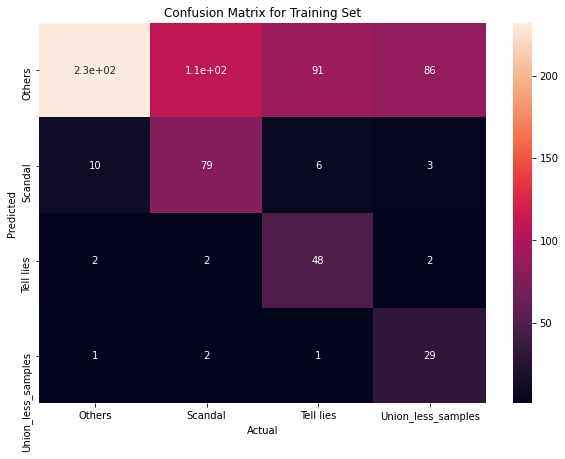

In [ ]:
#Checking the models performance on the Training set
predictions = rf.predict(Xn_train_tfidf)
pred_proba = rf.predict_proba(Xn_train_tfidf)

train_acc = ((predictions == yn_train).sum())/len(predictions)
print('Training Accuracy of the model is {}%.'.format(train_acc*100))

classes = np.unique(yn_train)
cm = confusion_matrix(predictions, yn_train, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Training Set')
plt.show()

Testing Accuracy of the model is 56.95364238410596%.


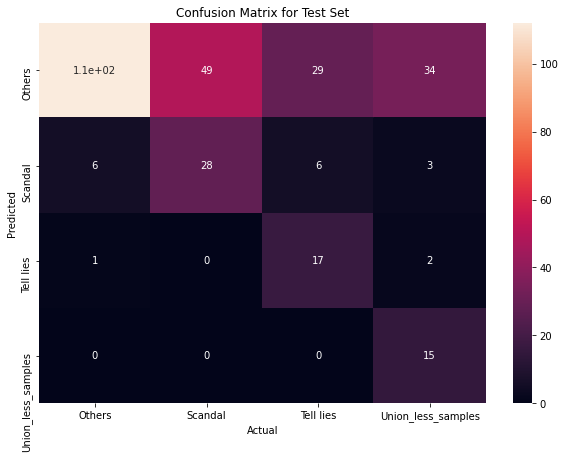

In [ ]:
#Checking the models performance on the Training set
predictions = rf.predict(Xn_test_tfidf)
pred_proba = rf.predict_proba(Xn_test_tfidf)

test_acc = ((predictions == yn_test).sum())/len(predictions)
print('Testing Accuracy of the model is {}%.'.format(test_acc*100))

classes = np.unique(yn_test)
cm = confusion_matrix(predictions, yn_test, labels =classes)
#print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in classes],\
                     columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for Test Set')
plt.show()

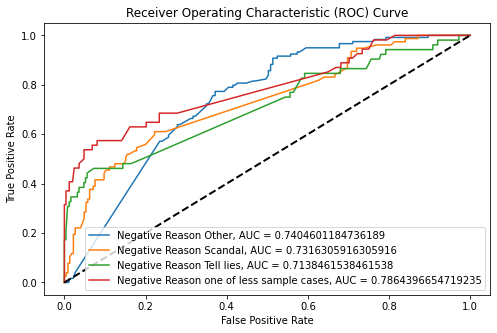

In [ ]:
#Plotting ROC curve
b_y_val = []
for target in yn_test:
  if(target == 'Others'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)

fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 0])
auc = roc_auc_score(b_y_val, pred_proba[:, 0])
label = 'Negative Reason Other, AUC = '+str(auc)
plt.figure(figsize = (8,5))
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Scandal'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 1])
auc = roc_auc_score(b_y_val, pred_proba[:, 1])
label = 'Negative Reason Scandal, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Tell lies'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 2])
auc = roc_auc_score(b_y_val, pred_proba[:, 2])
label = 'Negative Reason Tell lies, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

b_y_val = []
for target in yn_test:
  if(target == 'Union_less_samples'):
    b_y_val.append(1)
  else:
    b_y_val.append(0)
fpr, tpr, _ = roc_curve(b_y_val,  pred_proba[:, 3])
auc = roc_auc_score(b_y_val, pred_proba[:, 3])
label = 'Negative Reason one of less sample cases, AUC = '+str(auc)
plt.plot(fpr,tpr,label=label)

plt.plot([0,1], [0,1], color='black', lw=2, linestyle='--')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

Since the max_depth of optimal DT is 20 its more likely to overfit the dataset although the testing accuracy for DT is more. The final algorithm selected for this muliclasss clasification problem is a RF with 10 trees each with a max_depth of 5. 


The main source of error should be the vectorization if a new tweet has words which are not very common in the dataset then they are not encoded and therefore the sentiment prediction or reason prediction will be incorrect.

This would be one of the main reason as to why the model built on generic tweet dataset did not perform very well in the election dataset. To overcome this difference in vocabulary it is suggested that one should use word embeddings where words are embedded based on their meaning.

Another reason could be sarcastic tweets and double meaning words like 'its not good' but good being a key word could decide that this tweet is positive but it is actually not. One way of dealing with such problems is to use a n-gram model where the words before and after are also given importance.